# **Time Series Analysis on Asset Management Industry**

## Introduction
**Overview of the Asset Management Industry :**

The asset management industry plays a crucial role in global financial markets by managing investments on behalf of individuals and institutions. Companies like ICICI Prudential AMC, HDFC AMC, and Nippon Life India Asset Management Ltd. are key players, offering mutual funds, portfolio management services, and investment advisory. Effective asset management relies on understanding market trends, forecasting price movements, and mitigating risks.

**Importance of Time Series Analysis in Asset Management :**

Time series analysis is a powerful statistical tool used to model and predict financial data over time. In asset management, forecasting stock prices and market trends helps in making informed investment decisions. By analyzing past performance and market behavior, asset managers can enhance portfolio returns while managing risk exposure.

**Objective of the Project :**

This project focuses on time series forecasting of stock prices in the asset management industry using ARIMA models. The objective is to analyze historical stock price trends of ICICI, HDFC AMC, and Nippon Life India Asset Management Ltd. and develop forecasting models that can provide insights into future price movements. By leveraging ARIMA (AutoRegressive Integrated Moving Average), the study aims to identify patterns, detect seasonality, and improve investment decision-making strategies.

## Data Collection & Preprocessing

In [1]:
import pandas as pd

# Importing the yfinance package
import yfinance as yf

# Fetching data for Black Rock, HDFC AMC, Nippon Life for the last 5 years
icici = yf.download('ICICIPRULI.NS', period='5y')
hdfc = yf.download('HDFCAMC.NS', period='5y')
nippon = yf.download('NAM-INDIA.NS', period='5y')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
# Preview the first few rows of the dataset
icici.head()

Price              Close          High           Low          Open  \
Ticker     ICICIPRULI.NS ICICIPRULI.NS ICICIPRULI.NS ICICIPRULI.NS   
Date                                                                 
2020-02-18    468.793182    470.829890    462.981075    467.054520   
2020-02-19    486.378479    487.769433    467.501569    470.283448   
2020-02-20    491.793182    500.734877    487.620380    487.620380   
2020-02-24    483.298584    497.754311    480.367683    485.832052   
2020-02-25    477.933533    486.726205    471.922739    483.994020   

Price             Volume  
Ticker     ICICIPRULI.NS  
Date                      
2020-02-18        859469  
2020-02-19       1184541  
2020-02-20       1385523  
2020-02-24        947108  
2020-02-25       1146861

In [3]:
hdfc.head()

Price             Close         High          Low         Open     Volume
Ticker       HDFCAMC.NS   HDFCAMC.NS   HDFCAMC.NS   HDFCAMC.NS HDFCAMC.NS
Date                                                                     
2020-02-18  2952.834717  2976.076811  2917.398772  2975.159967     198514
2020-02-19  3079.038574  3094.349831  2966.908460  2966.908460     503635
2020-02-20  3102.417969  3159.995839  3066.844363  3091.599161     493099
2020-02-24  3005.645020  3108.056490  2990.838073  3080.597046     275139
2020-02-25  2993.038574  3066.844549  2981.853117  3023.752862     221332

In [4]:
nippon.head()

Price             Close         High          Low         Open       Volume
Ticker     NAM-INDIA.NS NAM-INDIA.NS NAM-INDIA.NS NAM-INDIA.NS NAM-INDIA.NS
Date                                                                       
2020-02-18   337.048889   339.499664   320.151278   323.934983      2005888
2020-02-19   369.167175   373.853795   339.843644   339.886630      6982668
2020-02-20   379.787231   389.461422   369.769075   373.036791      4149436
2020-02-24   366.372375   379.056316   363.405639   373.595793      2107594
2020-02-25   362.416748   376.906517   357.601145   368.737199      1848965

In [5]:
# Check for missing values
print(icici.isnull().sum())
print(hdfc.isnull().sum())
print(nippon.isnull().sum())

Price   Ticker       
Close   ICICIPRULI.NS    0
High    ICICIPRULI.NS    0
Low     ICICIPRULI.NS    0
Open    ICICIPRULI.NS    0
Volume  ICICIPRULI.NS    0
dtype: int64
Price   Ticker    
Close   HDFCAMC.NS    0
High    HDFCAMC.NS    0
Low     HDFCAMC.NS    0
Open    HDFCAMC.NS    0
Volume  HDFCAMC.NS    0
dtype: int64
Price   Ticker      
Close   NAM-INDIA.NS    0
High    NAM-INDIA.NS    0
Low     NAM-INDIA.NS    0
Open    NAM-INDIA.NS    0
Volume  NAM-INDIA.NS    0
dtype: int64


In [6]:
# Computing daily returns
icici['Daily Return'] = icici['Close'].pct_change()
hdfc['Daily Return'] = hdfc['Close'].pct_change()
nippon['Daily Return'] = nippon['Close'].pct_change()

In [7]:
print(icici[['Close', 'Daily Return']].head())
print(hdfc[['Close', 'Daily Return']].head())
print(nippon[['Close', 'Daily Return']].head())

Price              Close Daily Return
Ticker     ICICIPRULI.NS             
Date                                 
2020-02-18    468.793182          NaN
2020-02-19    486.378479     0.037512
2020-02-20    491.793182     0.011133
2020-02-24    483.298584    -0.017273
2020-02-25    477.933533    -0.011101
Price             Close Daily Return
Ticker       HDFCAMC.NS             
Date                                
2020-02-18  2952.834717          NaN
2020-02-19  3079.038574     0.042740
2020-02-20  3102.417969     0.007593
2020-02-24  3005.645020    -0.031193
2020-02-25  2993.038574    -0.004194
Price             Close Daily Return
Ticker     NAM-INDIA.NS             
Date                                
2020-02-18   337.048889          NaN
2020-02-19   369.167175     0.095293
2020-02-20   379.787231     0.028768
2020-02-24   366.372375    -0.035322
2020-02-25   362.416748    -0.010797


In [8]:
# Resample to get the last 'Close' price of each month, as we have date time index
icici_monthly = icici['Close'].resample('M').last()
hdfc_monthly = hdfc['Close'].resample('M').last()
nippon_monthly = nippon['Close'].resample('M').last()

<ipython-input-8-a02bc81ed76f>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  icici_monthly = icici['Close'].resample('M').last()
<ipython-input-8-a02bc81ed76f>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hdfc_monthly = hdfc['Close'].resample('M').last()
<ipython-input-8-a02bc81ed76f>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nippon_monthly = nippon['Close'].resample('M').last()


In [9]:
print(icici_monthly.head())
print(hdfc_monthly.head())
print(nippon_monthly.head())

Ticker      ICICIPRULI.NS
Date                     
2020-02-29     468.346069
2020-03-31     353.395660
2020-04-30     409.281219
2020-05-31     390.553345
2020-06-30     423.041473
Ticker       HDFCAMC.NS
Date                   
2020-02-29  2880.174805
2020-03-31  1937.109009
2020-04-30  2320.304199
2020-05-31  2314.481689
2020-06-30  2276.845459
Ticker      NAM-INDIA.NS
Date                    
2020-02-29    335.801941
2020-03-31    214.294098
2020-04-30    212.187286
2020-05-31    219.453659
2020-06-30    272.057922


In [10]:
# Check for missing values
print(icici_monthly.isnull().sum())
print(hdfc_monthly.isnull().sum())
print(nippon_monthly.isnull().sum())

Ticker
ICICIPRULI.NS    0
dtype: int64
Ticker
HDFCAMC.NS    0
dtype: int64
Ticker
NAM-INDIA.NS    0
dtype: int64


**How to Handle Missing Data During Resampling**

Sometimes resampling can introduce missing data, especially when resampling to lower frequencies (e.g., from daily to monthly). Pandas provides several ways to handle missing values after resampling:

**ffill() (Forward Fill): Fills missing values with the previous day's data.**

monthly_data = data['Close'].resample('ME').last().ffill()

**M is now getting replaced with ME**
     
**bfill() (Backward Fill): Fills missing values with the next valid value. Use the next day's data if FFILL is not suitable**

monthly_data = data['Close'].resample('M').last().bfill()

**Interpolate Missing Values – For a smooth time series:**

monthly_data = data['Close'].resample('M').mean().interpolate(method='linear')

In [11]:
# Summary statistics for the adjusted close prices
icici_summary = icici['Close'].describe()
hdfc_summary = hdfc['Close'].describe()
nippon_summary = nippon['Close'].describe()

In [12]:
print (icici_summary)
print (hdfc_summary)
print (nippon_summary)

Ticker  ICICIPRULI.NS
count     1239.000000
mean       534.620498
std         97.733486
min        237.252975
25%        458.758606
50%        525.975464
75%        590.746674
max        791.049988
Ticker   HDFCAMC.NS
count   1240.000000
mean    2681.846465
std      804.710853
min     1596.325439
25%     2065.447693
50%     2478.097046
75%     2993.872498
max     4827.899902
Ticker  NAM-INDIA.NS
count    1240.000000
mean      355.963454
std       151.145498
min       184.798553
25%       246.888416
50%       297.606689
75%       401.561562
max       805.900024


**Plotting histograms for daily returns to check distribution of data**

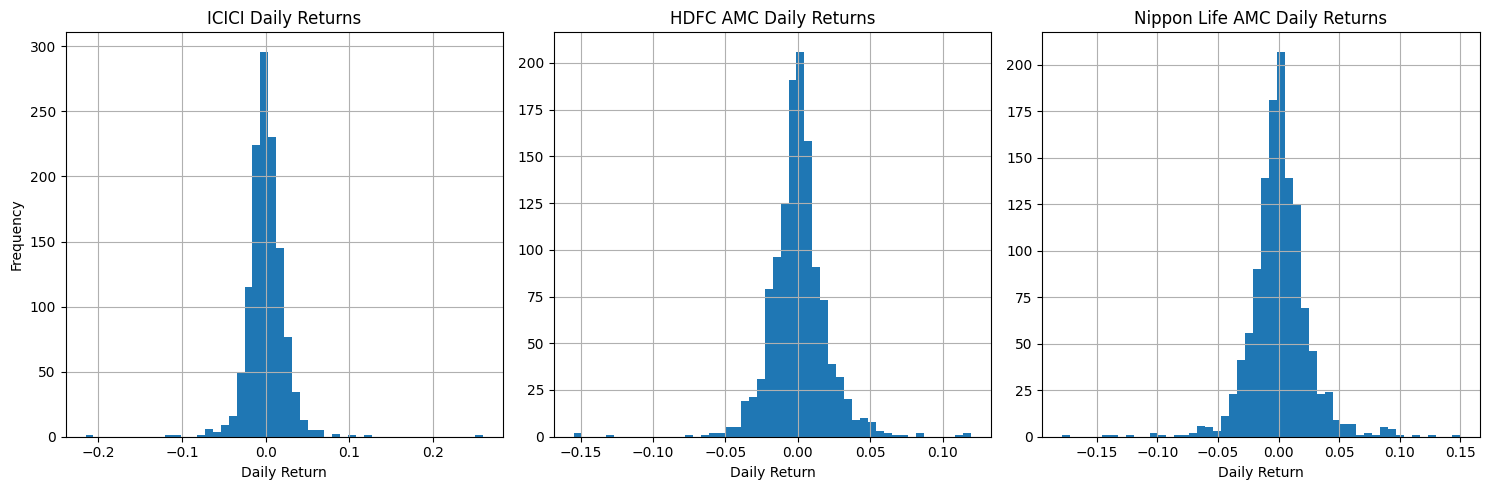

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
icici['Daily Return'].hist(bins=50)
plt.title('ICICI Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
# frequency is number of days

plt.subplot(1, 3, 2)
hdfc['Daily Return'].hist(bins=50)
plt.title('HDFC AMC Daily Returns')
plt.xlabel('Daily Return')

plt.subplot(1, 3, 3)
nippon['Daily Return'].hist(bins=50)
plt.title('Nippon Life AMC Daily Returns')
plt.xlabel('Daily Return')

plt.tight_layout()
plt.show()

**Plotting the Close Prices for all three stocks**

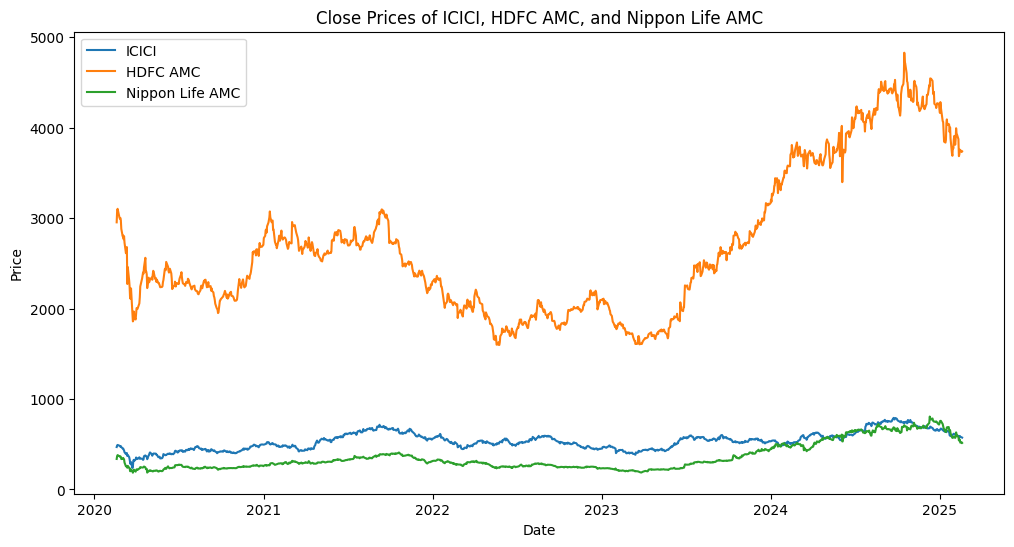

In [14]:
plt.figure(figsize=(12, 6))

plt.plot(icici.index, icici['Close'], label="ICICI")
plt.plot(hdfc.index, hdfc['Close'], label="HDFC AMC")
plt.plot(nippon.index, nippon['Close'], label="Nippon Life AMC")

plt.title('Close Prices of ICICI, HDFC AMC, and Nippon Life AMC')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

**Rolling Mean (Moving Average)**

Significance:

The rolling mean calculates the average value of a time series over a specific window (e.g., 30 days) and "rolls" this window along the time series data. This smooths out short-term fluctuations and highlights longer-term trends.

In financial data, a rolling mean is often used to smooth out price data, helping to identify trends without being overly sensitive to daily volatility.

How to Interpret:

Trend Identification: If the rolling mean is moving upwards, it suggests an upward trend in the data (e.g., an increasing stock price).

If it’s moving downwards, it indicates a downward trend.

Momentum: Comparing the current price with the rolling mean can give insights into the momentum. If the price is consistently above the rolling mean, it indicates positive momentum (bullish). If it is consistently below, it suggests negative momentum (bearish).

**Rolling Standard Deviation**

Significance:

The rolling standard deviation measures how spread out the values in the data are over a specific window of time. In financial terms, this is often referred to as volatility.

High standard deviation indicates that the data points (e.g., stock prices or returns) are widely spread out, meaning the asset is more volatile. Low standard deviation suggests less volatility and that the prices are more stable.

How to Interpret:

Volatility: A higher rolling standard deviation indicates higher volatility over the window. It shows that the stock (or any financial instrument) has been experiencing larger price swings.

Risk: In finance, volatility is often equated with risk. If the rolling standard deviation is increasing, it may indicate that the asset is becoming riskier to hold. Conversely, a decreasing rolling standard deviation suggests that the asset is stabilizing.

Practical Interpretation in Financial Analysis:

Bullish vs. Bearish Trends:

If the price consistently stays above the rolling mean, this may indicate a strong bullish (upward) trend.

If the price consistently stays below the rolling mean, it indicates a bearish (downward) trend.

**Volatility Analysis:**

Investors might avoid highly volatile stocks (high rolling standard deviation) if they are risk-averse, as high volatility suggests the stock may experience unpredictable price swings. Conversely, risk-tolerant investors might be attracted to volatile stocks for potential high returns

<Axes: xlabel='Date'>

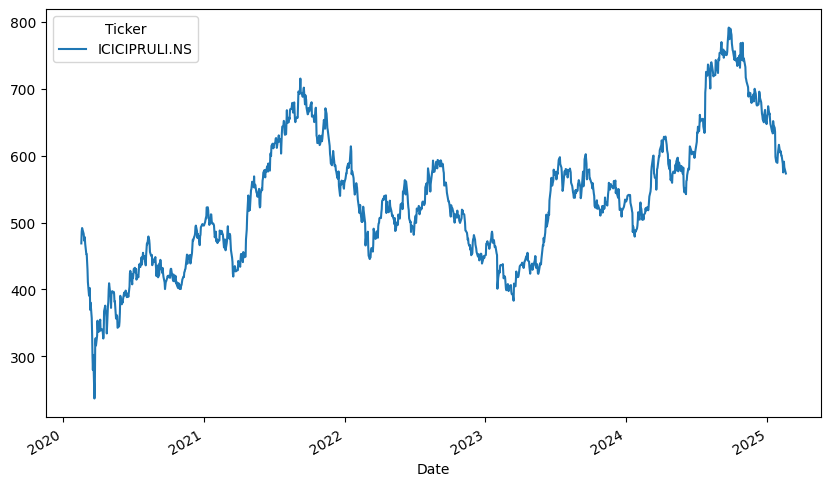

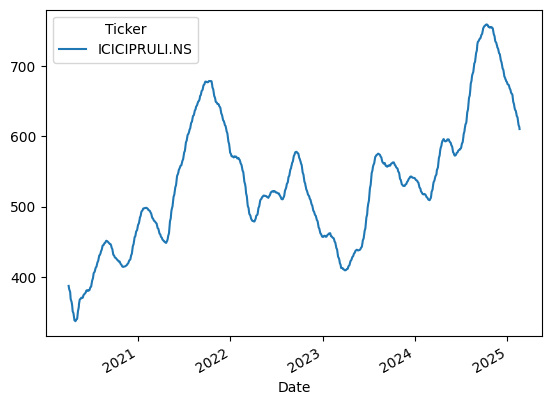

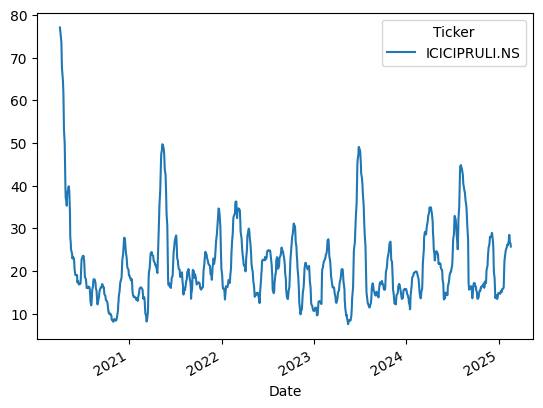

In [15]:
# Plot rolling mean and standard deviation for ICICI Prudential AMC
icici['Close'].plot(label='ICICI Original', figsize=(10,6))
icici['Close'].rolling(window=30).mean().plot(label='ICICI 30-Day Moving Average')
icici['Close'].rolling(window=30).std().plot(label='ICICI 30-Day Moving Std')

<Axes: xlabel='Date'>

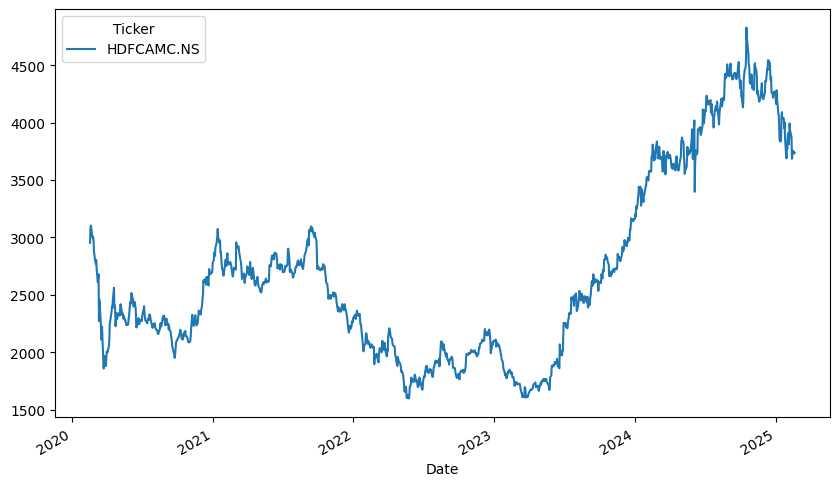

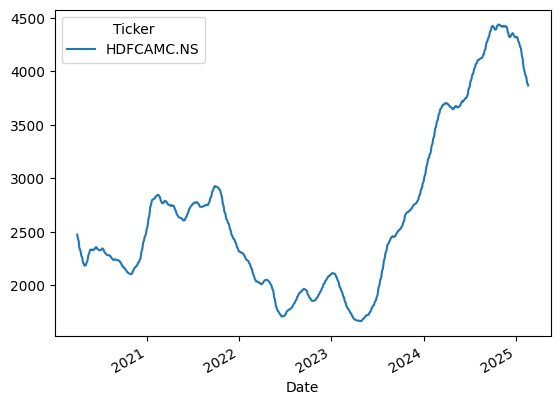

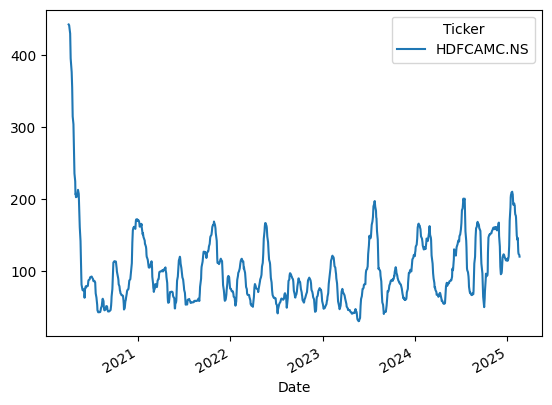

In [16]:
# Plot rolling mean and standard deviation for HDFC AMC
hdfc['Close'].plot(label='HDFC Original', figsize=(10,6))
hdfc['Close'].rolling(window=30).mean().plot(label='HDFC 30-Day Moving Average')
hdfc['Close'].rolling(window=30).std().plot(label='HDFC 30-Day Moving Std')

<Axes: xlabel='Date'>

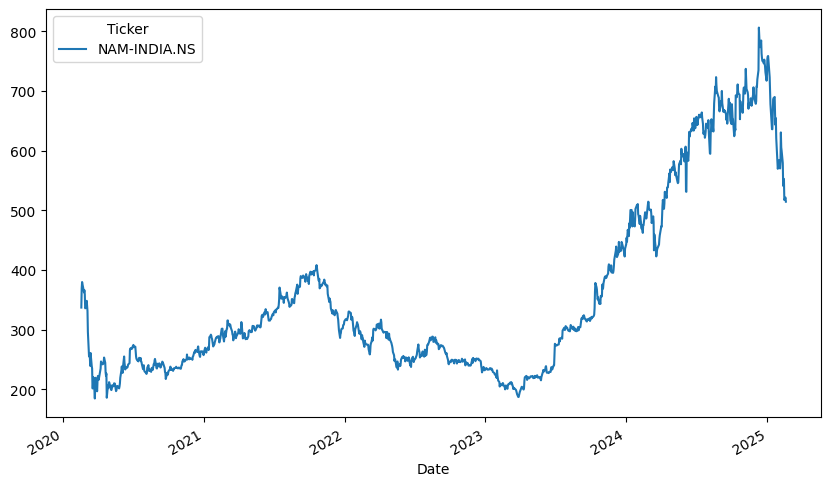

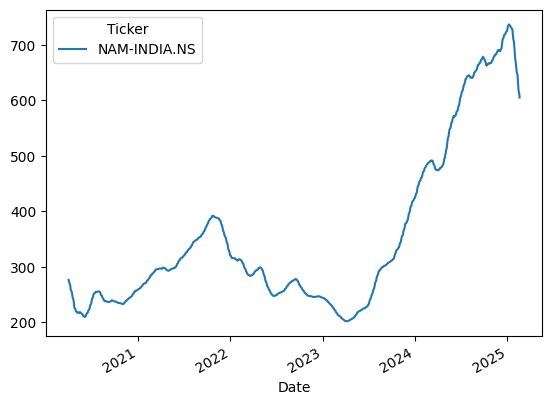

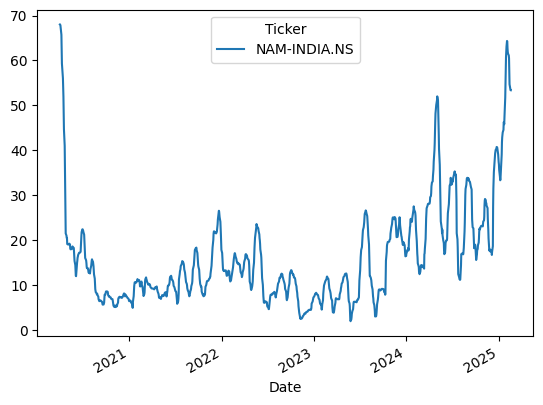

In [17]:
# Plot rolling mean and standard deviation for Nippon AMC
nippon['Close'].plot(label='Nippon Original', figsize=(10,6))
nippon['Close'].rolling(window=30).mean().plot(label='Nippon 30-Day Moving Average')
nippon['Close'].rolling(window=30).std().plot(label='Nippon 30-Day Moving Std')

In [18]:
# Resample to weekly frequency and apply a 4-week rolling mean

icici_weekly_rolling = icici['Close'].resample('W').mean().rolling(window=4).mean()
print(icici_weekly_rolling.head())

hdfc_weekly_rolling = hdfc['Close'].resample('W').mean().rolling(window=4).mean()
print(hdfc_weekly_rolling.head())

nippon_weekly_rolling = nippon['Close'].resample('W').mean().rolling(window=4).mean()
print(nippon_weekly_rolling.head())

Ticker      ICICIPRULI.NS
Date                     
2020-02-23            NaN
2020-03-01            NaN
2020-03-08            NaN
2020-03-15     445.453889
2020-03-22     403.478429
Ticker       HDFCAMC.NS
Date                   
2020-02-23          NaN
2020-03-01          NaN
2020-03-08          NaN
2020-03-15  2825.078151
2020-03-22  2613.452924
Ticker      NAM-INDIA.NS
Date                    
2020-02-23           NaN
2020-03-01           NaN
2020-03-08           NaN
2020-03-15    325.889496
2020-03-22    290.302082


In [19]:
# Check for missing values in ICICI Prudential AMC weekly rolling data
icici_weekly_rolling_missing = icici_weekly_rolling.isnull().sum()
print(icici_weekly_rolling_missing)

# Check for missing values in HDFC AMC weekly rolling data
hdfc_weekly_rolling_missing = hdfc_weekly_rolling.isnull().sum()
print(hdfc_weekly_rolling_missing)

# Check for missing values in Nippon AMC weekly rolling data
nippon_weekly_rolling_missing = nippon_weekly_rolling.isnull().sum()
print(nippon_weekly_rolling_missing)


Ticker
ICICIPRULI.NS    3
dtype: int64
Ticker
HDFCAMC.NS    3
dtype: int64
Ticker
NAM-INDIA.NS    3
dtype: int64


In [20]:
#Drop missing values for ICICI Prudential AMC
icici.dropna()

# Fill missing values using backward fill for ICICI Prudential AMC
icici_filled = icici.fillna(method='bfill')

# Check if missing values still exist for ICICI
print(icici_filled.isnull().sum())


Price         Ticker       
Close         ICICIPRULI.NS    0
High          ICICIPRULI.NS    0
Low           ICICIPRULI.NS    0
Open          ICICIPRULI.NS    0
Volume        ICICIPRULI.NS    0
Daily Return                   0
dtype: int64


<ipython-input-20-ac836911d19a>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  icici_filled = icici.fillna(method='bfill')


In [21]:
#Drop missing values for ICICI Prudential AMC
hdfc.dropna()

# Fill missing values using backward fill for ICICI Prudential AMC
hdfc_filled = hdfc.fillna(method='bfill')

# Check if missing values still exist for ICICI
print(hdfc_filled.isnull().sum())

Price         Ticker    
Close         HDFCAMC.NS    0
High          HDFCAMC.NS    0
Low           HDFCAMC.NS    0
Open          HDFCAMC.NS    0
Volume        HDFCAMC.NS    0
Daily Return                0
dtype: int64


<ipython-input-21-359dbfdff530>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hdfc_filled = hdfc.fillna(method='bfill')


In [22]:
#Drop missing values for ICICI Prudential AMC
nippon.dropna()

# Fill missing values using backward fill for ICICI Prudential AMC
nippon_filled = nippon.fillna(method='bfill')

# Check if missing values still exist for ICICI
print(nippon_filled.isnull().sum())

Price         Ticker      
Close         NAM-INDIA.NS    0
High          NAM-INDIA.NS    0
Low           NAM-INDIA.NS    0
Open          NAM-INDIA.NS    0
Volume        NAM-INDIA.NS    0
Daily Return                  0
dtype: int64


<ipython-input-22-09a8be09520c>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nippon_filled = nippon.fillna(method='bfill')


**Handling Outliers**

In [23]:
from scipy import stats

# Drop missing values from 'Daily Return' and calculate Z-scores for ICICI Prudential AMC
icici_daily_returns_clean = icici['Daily Return'].dropna()
icici_z_scores = stats.zscore(icici_daily_returns_clean)

# Define a threshold for outliers (absolute Z-score > 3) for ICICI
icici_outliers = icici_daily_returns_clean[abs(icici_z_scores) > 3]
print(icici_outliers)

# Drop missing values from 'Daily Return' and calculate Z-scores for HDFC AMC
hdfc_daily_returns_clean = hdfc['Daily Return'].dropna()
hdfc_z_scores = stats.zscore(hdfc_daily_returns_clean)

# Define a threshold for outliers (absolute Z-score > 3) for HDFC
hdfc_outliers = hdfc_daily_returns_clean[abs(hdfc_z_scores) > 3]
print(hdfc_outliers)

# Drop missing values from 'Daily Return' and calculate Z-scores for Nippon AMC
nippon_daily_returns_clean = nippon['Daily Return'].dropna()
nippon_z_scores = stats.zscore(nippon_daily_returns_clean)

# Define a threshold for outliers (absolute Z-score > 3) for Nippon
nippon_outliers = nippon_daily_returns_clean[abs(nippon_z_scores) > 3]
print(nippon_outliers)

Date
2020-03-12   -0.081038
2020-03-17   -0.066871
2020-03-18   -0.102056
2020-03-20    0.080448
2020-03-23   -0.214990
2020-03-25    0.259383
2020-04-17    0.104823
2020-04-24   -0.068503
2020-04-27    0.121676
2020-05-18   -0.067559
2020-05-29    0.069078
2022-02-24   -0.067099
2023-02-01   -0.111516
2024-07-24    0.087484
Name: Daily Return, dtype: float64
Date
2020-03-12   -0.152176
2020-03-13    0.082206
2020-03-16   -0.061023
2020-03-23   -0.128749
2020-04-21   -0.059599
2020-04-24   -0.063079
2020-09-28    0.066706
2021-03-03    0.086841
2022-02-24   -0.074166
2022-04-01    0.060786
2022-08-16    0.114925
2023-06-20    0.112262
2023-06-30    0.119829
2024-06-04   -0.154711
2024-06-05    0.071730
Name: Daily Return, dtype: float64
Date
2020-02-19    0.095293
2020-03-06   -0.106295
2020-03-09   -0.138106
2020-03-13    0.089767
2020-03-16   -0.083526
2020-03-18   -0.141786
2020-03-20    0.091780
2020-03-23   -0.099863
2020-03-25    0.086552
2020-03-26    0.092934
2020-03-31    0.08

In [24]:
# Define a threshold value for outliers, for example, 5% (0.05)
threshold = 0.05  # significance level

# Apply clipping to 'Daily Return' column for ICICI Prudential AMC
icici['Daily Return'] = icici['Daily Return'].clip(lower=-threshold, upper=threshold)
print(icici['Daily Return'].describe())

# Apply clipping to 'Daily Return' column for HDFC AMC
hdfc['Daily Return'] = hdfc['Daily Return'].clip(lower=-threshold, upper=threshold)
print(hdfc['Daily Return'].describe())

# Apply clipping to 'Daily Return' column for Nippon AMC
nippon['Daily Return'] = nippon['Daily Return'].clip(lower=-threshold, upper=threshold)
print(nippon['Daily Return'].describe())

count    1238.000000
mean        0.000355
std         0.018441
min        -0.050000
25%        -0.010652
50%         0.000114
75%         0.011130
max         0.050000
Name: Daily Return, dtype: float64
count    1239.000000
mean        0.000393
std         0.017454
min        -0.050000
25%        -0.009305
50%         0.000105
75%         0.009568
max         0.050000
Name: Daily Return, dtype: float64
count    1239.000000
mean        0.000579
std         0.020217
min        -0.050000
25%        -0.010997
50%         0.000000
75%         0.012565
max         0.050000
Name: Daily Return, dtype: float64


In [25]:
from datetime import datetime, timedelta

# Calculate the start date as 3 years from today
start_date = (datetime.now() - timedelta(days=3*365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

# List of tickers for ICICI Prudential AMC, HDFC AMC, and NIPPON AMC
tickers = ['ICICIPRULI.NS', 'HDFCAMC.NS', 'NAM-INDIA.NS']

# Download stock data for the tickers
data = yf.download(tickers, start=start_date, end=end_date)

# Save the 'Close' prices to a CSV file
close_prices = data['Close']
print(close_prices.head())

# Save the data to CSV file
close_prices.to_csv('ICICI_HDFC_NIPPON_last_3_years.csv')

print('Data saved to ICICI_HDFC_NIPPON_last_3_years.csv')


[*********************100%***********************]  3 of 3 completed

Ticker       HDFCAMC.NS  ICICIPRULI.NS  NAM-INDIA.NS
Date                                                
2022-02-21  2035.927979     508.974823    271.306915
2022-02-22  2045.821045     503.541626    281.705750
2022-02-23  2046.992920     499.205109    278.224609
2022-02-24  1895.176514     465.708740    277.019592
2022-02-25  1951.345703     475.976990    276.037720
Data saved to ICICI_HDFC_NIPPON_last_3_years.csv


## **Time Series Forecasting**

In [26]:
# Loading the uploaded stock price data
data = pd.read_csv("ICICI_HDFC_NIPPON_last_3_years.csv")
h = data[["Date", "HDFCAMC.NS"]]
i = data[["Date", "ICICIPRULI.NS"]]
n = data[["Date", "NAM-INDIA.NS"]]

In [27]:
i = i.dropna()

In [28]:
# Convert the 'Date' column to datetime and set it as the index
h['Date'] = pd.to_datetime(h['Date'])
h.set_index('Date', inplace=True)

i['Date'] = pd.to_datetime(i['Date'])
i.set_index('Date', inplace=True)

n['Date'] = pd.to_datetime(n['Date'])
n.set_index('Date', inplace=True)

<ipython-input-28-6f7a8ebfa4c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['Date'] = pd.to_datetime(h['Date'])
<ipython-input-28-6f7a8ebfa4c0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['Date'] = pd.to_datetime(n['Date'])


In [29]:
# Resample the data to daily frequency
h = h.asfreq('D', method='pad')
i = i.asfreq('D', method='pad')
n = n.asfreq('D', method='pad')

In [30]:
print(h.head())
print(i.head())
print(n.head())

             HDFCAMC.NS
Date                   
2022-02-21  2035.927979
2022-02-22  2045.821045
2022-02-23  2046.992920
2022-02-24  1895.176514
2022-02-25  1951.345703
            ICICIPRULI.NS
Date                     
2022-02-21     508.974823
2022-02-22     503.541626
2022-02-23     499.205109
2022-02-24     465.708740
2022-02-25     475.976990
            NAM-INDIA.NS
Date                    
2022-02-21    271.306915
2022-02-22    281.705750
2022-02-23    278.224609
2022-02-24    277.019592
2022-02-25    276.037720


### **Performing seasonal decomposition**

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

<Figure size 1200x800 with 0 Axes>

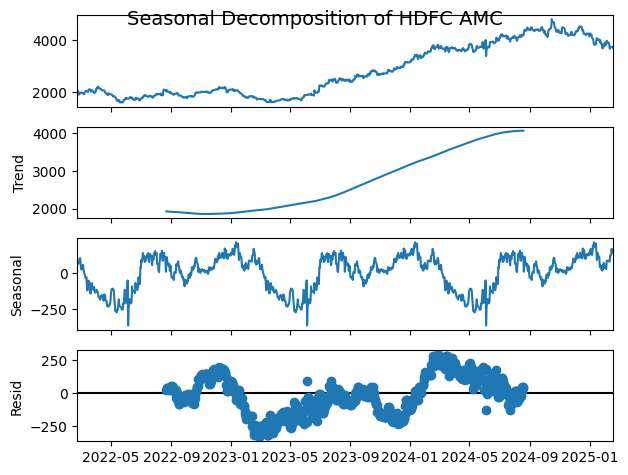

In [32]:
# Decompose and plot for HDFC AMC
decomposition_h = seasonal_decompose(h, model='additive', period=365)
plt.figure(figsize=(12, 8))
decomposition_h.plot()
plt.suptitle("Seasonal Decomposition of HDFC AMC", fontsize=14)
plt.show()

<Figure size 1200x800 with 0 Axes>

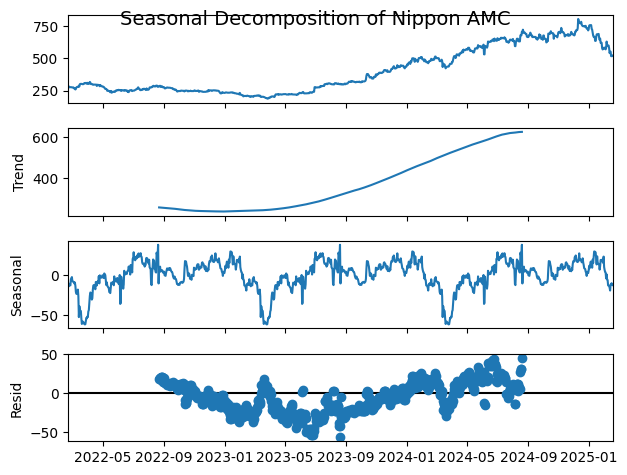

In [33]:
# Decompose and plot for Nippon AMC
decomposition_n = seasonal_decompose(n, model='additive', period=365)
plt.figure(figsize=(12, 8))
decomposition_n.plot()
plt.suptitle("Seasonal Decomposition of Nippon AMC", fontsize=14)
plt.show()

<Figure size 1200x800 with 0 Axes>

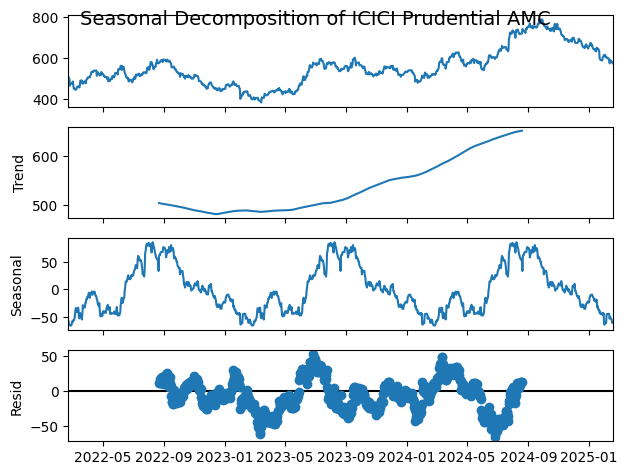

In [34]:
# Decompose and plot for ICICI Prudential AMC
decomposition_i = seasonal_decompose(i, model='additive', period=365)
plt.figure(figsize=(12, 8))
decomposition_i.plot()
plt.suptitle("Seasonal Decomposition of ICICI Prudential AMC", fontsize=14)
plt.show()

### **Augmented Dickey-Fuller (ADF) test**

In [35]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'Adj Close' series for HDFC AMC
adf_result_h = adfuller(h["HDFCAMC.NS"])
adf_statistic_h = adf_result_h[0]
p_value_h = adf_result_h[1]
critical_values_h = adf_result_h[4]

# Perform the ADF test on the 'Adj Close' series for ICICI Prudential AMC
adf_result_i = adfuller(i["ICICIPRULI.NS"])
adf_statistic_i = adf_result_i[0]
p_value_i = adf_result_i[1]
critical_values_i = adf_result_i[4]

# Perform the ADF test on the 'Adj Close' series for Nippon AMC
adf_result_n = adfuller(n["NAM-INDIA.NS"])
adf_statistic_n = adf_result_n[0]
p_value_n = adf_result_n[1]
critical_values_n = adf_result_n[4]

In [36]:
(adf_statistic_h, p_value_h, critical_values_h)

(-0.4326380993401689,
 0.9045051096731602,
 {'1%': -3.4364533503600962,
  '5%': -2.864234857527328,
  '10%': -2.568204837482531})

In [37]:
(adf_statistic_i, p_value_i, critical_values_i)

(-1.471739066075928,
 0.5474424371159272,
 {'1%': -3.436352507699052, '5%': -2.86419037625175, '10%': -2.56818114683546})

In [38]:
(adf_statistic_n, p_value_n, critical_values_n)

(-0.8326239531729007,
 0.8093507279457774,
 {'1%': -3.4364647646486093,
  '5%': -2.864239892228526,
  '10%': -2.5682075189699822})

**Null hypothesis is that data is non stationary**

Since all the p-values are higher than the common significance level of 0.05, we fail to reject the null hypothesis that the data is non-stationary.

This means the data is non-stationary, and we need to apply techniques like differencing to achieve stationarity.

### **Determining the Right Order of Differencing**

To achieve stationarity, we apply differencing. We can use the Autocorrelation Function (ACF) plot to determine the appropriate number of differencing steps.

Let's first plot the ACF of the data and see how it behaves after differencing

<Figure size 800x600 with 0 Axes>

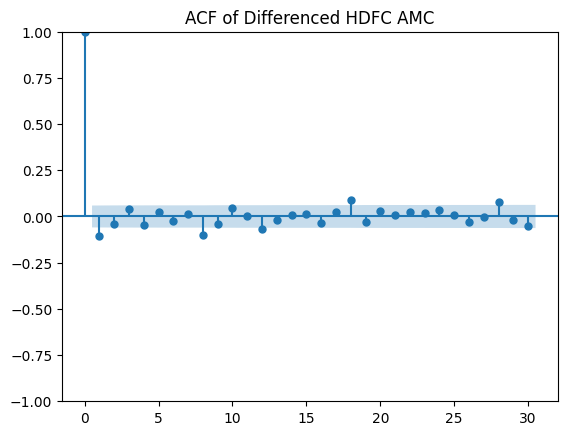

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import matplotlib.pyplot as plt

# Perform first differencing for HDFC AMC
h_diff = h["HDFCAMC.NS"].diff().dropna()

# Plot ACF for differenced data of HDFC AMC
plt.figure(figsize=(8, 6))
plot_acf(h_diff, lags=30)
plt.title("ACF of Differenced HDFC AMC")
plt.show()

<Figure size 800x600 with 0 Axes>

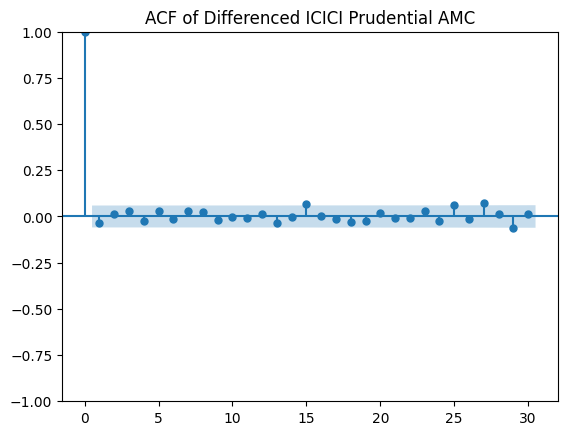

In [40]:
# Perform first differencing for ICICI Prudential AMC
i_diff = i["ICICIPRULI.NS"].diff().dropna()

# Plot ACF for differenced data of ICICI Prudential AMC
plt.figure(figsize=(8, 6))
plot_acf(i_diff, lags=30)
plt.title("ACF of Differenced ICICI Prudential AMC")
plt.show()

<Figure size 800x600 with 0 Axes>

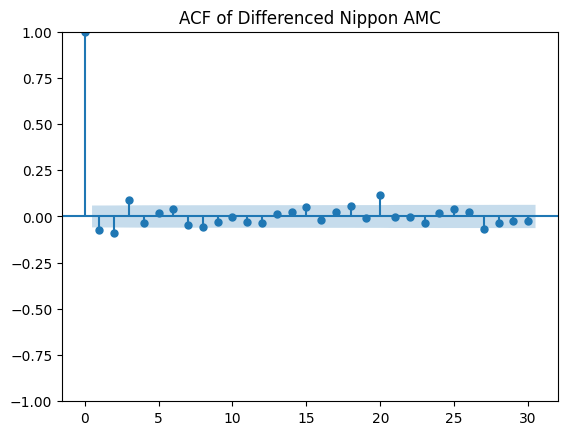

In [41]:
# Perform first differencing for Nippon AMC
n_diff = n["NAM-INDIA.NS"].diff().dropna()

# Plot ACF for differenced data of Nippon AMC
plt.figure(figsize=(8, 6))
plot_acf(n_diff, lags=30)
plt.title("ACF of Differenced Nippon AMC")
plt.show()

**The Autocorrelation Function (ACF) plots shows significant autocorrelations at lag 1 and gradually diminishes afterward, which indicates that the first differencing may be sufficient to achieve stationarity.**

## **ARIMA Modelling**

The three main parameters:

p: The number of lag observations (AutoRegressive term).

d: The number of times the series needs to be differenced (Integrated term).

q: The size of the moving average window (Moving Average term).

**Let's proceed with determining the appropriate p and q values using the Partial Autocorrelation Function (PACF) and the ACF plots.**


<Figure size 800x600 with 0 Axes>

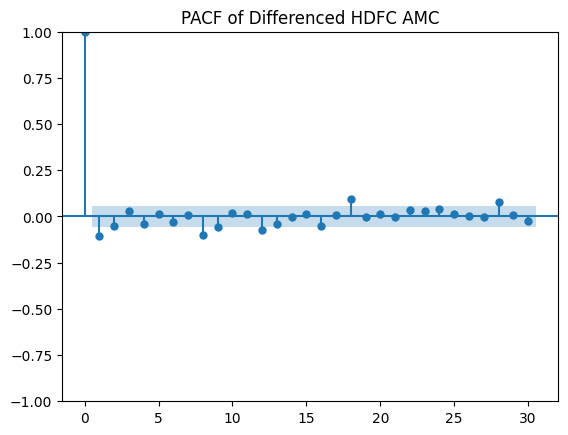

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Plot PACF for the differenced data of HDFC AMC
plt.figure(figsize=(8, 6))
plot_pacf(h_diff, lags=30)
plt.title("PACF of Differenced HDFC AMC")
plt.show()

<Figure size 800x600 with 0 Axes>

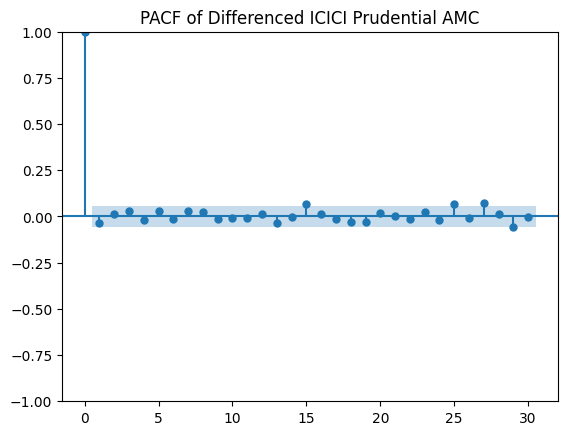

In [43]:
# Plot PACF for the differenced data of ICICI Prudential AMC
plt.figure(figsize=(8, 6))
plot_pacf(i_diff, lags=30)
plt.title("PACF of Differenced ICICI Prudential AMC")
plt.show()

<Figure size 800x600 with 0 Axes>

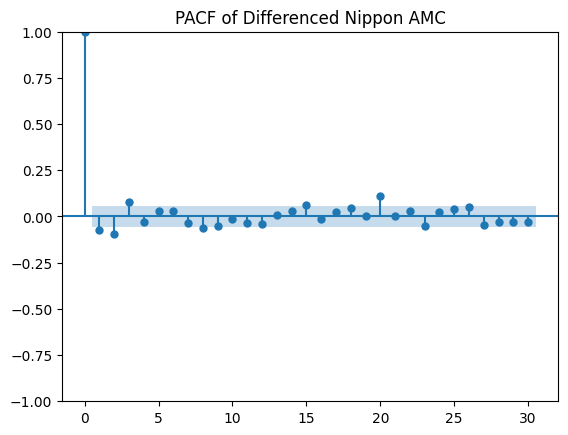

In [44]:
# Plot PACF for the differenced data of Nippon AMC
plt.figure(figsize=(8, 6))
plot_pacf(n_diff, lags=30)
plt.title("PACF of Differenced Nippon AMC")
plt.show()

**Finding the Best ARIMA Model**

To fine-tune the model, we use information criteria like Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). These metrics help in comparing different models and selecting the one that balances model complexity and goodness of fit.

We'll try different combinations of p, d, and q, and evaluate the models using AIC and BIC.

Let's test the ARIMA model with the initial guess of (p=1, d=1, q=1) and evaluate its performance

In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
# Build and fit the ARIMA model for HDFC AMC (p=1, d=1, q=1)
model_h = ARIMA(h["HDFCAMC.NS"], order=(1, 1, 1))
arima_result_h = model_h.fit()

# Extract AIC and BIC for HDFC AMC
aic_h = arima_result_h.aic
bic_h = arima_result_h.bic

# Build and fit the ARIMA model for ICICI Prudential AMC (p=1, d=1, q=1)
model_i = ARIMA(i["ICICIPRULI.NS"], order=(1, 1, 1))
arima_result_i = model_i.fit()

# Extract AIC and BIC for ICICI Prudential AMC
aic_i = arima_result_i.aic
bic_i = arima_result_i.bic

# Build and fit the ARIMA model for Nippon AMC (p=1, d=1, q=1)
model_n = ARIMA(n["NAM-INDIA.NS"], order=(1, 1, 1))
arima_result_n = model_n.fit()

# Extract AIC and BIC for Nippon AMC
aic_n = arima_result_n.aic
bic_n = arima_result_n.bic

In [47]:
# Display AIC and BIC values
(aic_h, bic_h)

(11537.49155766626, 11552.478856135174)

In [48]:
(aic_i, bic_i)

(7601.557742814184, 7616.545041283099)

In [49]:
(aic_n, bic_n)

(7927.260850314056, 7942.248148782971)

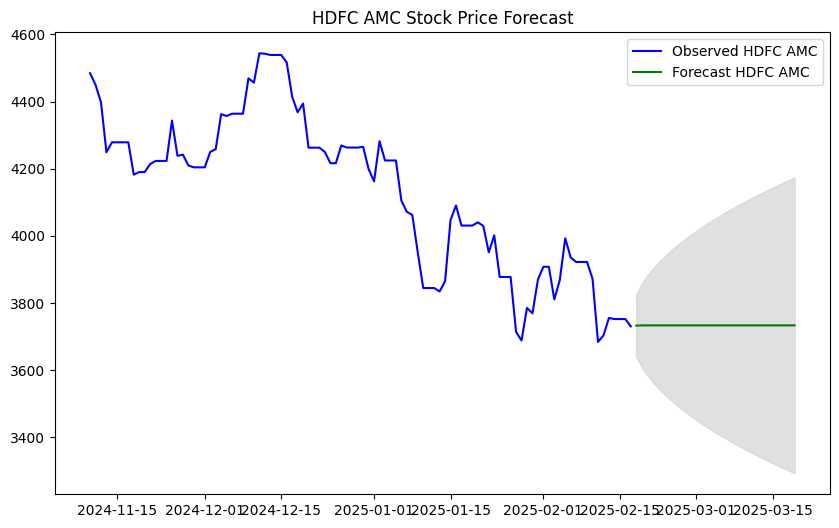

In [50]:
# Generate a forecast for the next 30 days for HDFC AMC
forecast_steps = 30
forecast_h = arima_result_h.get_forecast(steps=forecast_steps)
forecast_mean_h = forecast_h.predicted_mean
forecast_ci_h = forecast_h.conf_int()

# Plot the forecast for HDFC AMC
plt.figure(figsize=(10, 6))
plt.plot(h.index[-100:], h["HDFCAMC.NS"][-100:], label='Observed HDFC AMC', color='blue')
plt.plot(forecast_mean_h.index, forecast_mean_h, label='Forecast HDFC AMC', color='green')
plt.fill_between(forecast_ci_h.index, forecast_ci_h.iloc[:, 0], forecast_ci_h.iloc[:, 1], color='lightgray', alpha=0.7)
plt.title('HDFC AMC Stock Price Forecast')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
# Calculate the forecast for the training set (in-sample forecast) for HDFC AMC
in_sample_forecast_h = arima_result_h.predict(start=h.index[1], end=h.index[-1], typ='levels')

# Calculate accuracy metrics for HDFC AMC
mae_h = mean_absolute_error(h[1:], in_sample_forecast_h)
mse_h = mean_squared_error(h[1:], in_sample_forecast_h)
rmse_h = np.sqrt(mse_h)

(mae_h, mse_h, rmse_h)

(26.562000191316802, 2257.6625837039574, 47.51486697554732)

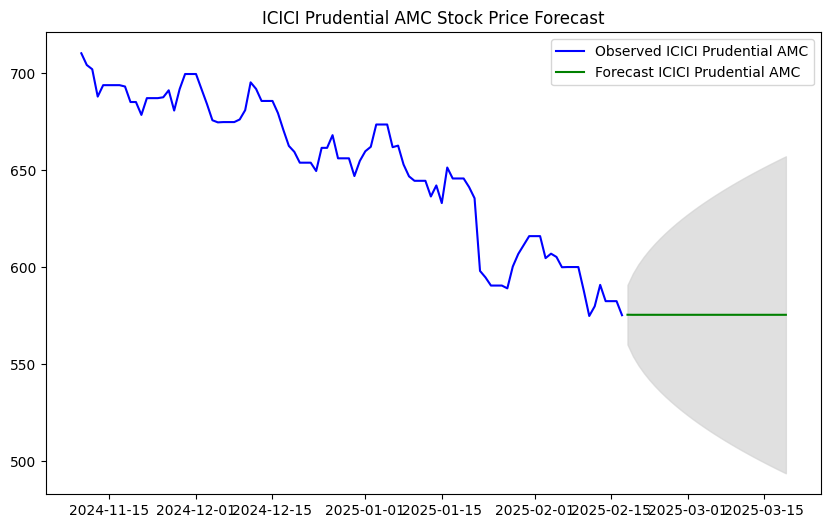

In [53]:
# Generate forecast and accuracy metrics for ICICI Prudential AMC
forecast_i = arima_result_i.get_forecast(steps=forecast_steps)
forecast_mean_i = forecast_i.predicted_mean
forecast_ci_i = forecast_i.conf_int()

# Plot the forecast for ICICI Prudential AMC
plt.figure(figsize=(10, 6))
plt.plot(i.index[-100:], i["ICICIPRULI.NS"][-100:], label='Observed ICICI Prudential AMC', color='blue')
plt.plot(forecast_mean_i.index, forecast_mean_i, label='Forecast ICICI Prudential AMC', color='green')
plt.fill_between(forecast_ci_i.index, forecast_ci_i.iloc[:, 0], forecast_ci_i.iloc[:, 1], color='lightgray', alpha=0.7)
plt.title('ICICI Prudential AMC Stock Price Forecast')
plt.legend()
plt.show()

In [54]:
# In-sample forecast and accuracy metrics for ICICI Prudential AMC
in_sample_forecast_i = arima_result_i.predict(start=i.index[1], end=i.index[-1], typ='levels')

mae_i = mean_absolute_error(i[1:], in_sample_forecast_i)
mse_i = mean_squared_error(i[1:], in_sample_forecast_i)
rmse_i = np.sqrt(mse_i)

(mae_i, mse_i, rmse_i)

(4.907170886070727, 61.42158489295931, 7.837192411377898)

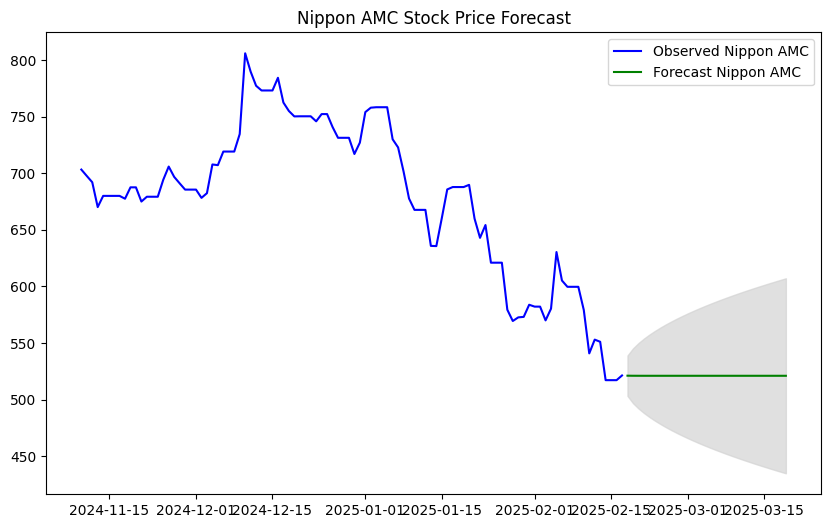

In [55]:
# Generate forecast and accuracy metrics for Nippon AMC
forecast_n = arima_result_n.get_forecast(steps=forecast_steps)
forecast_mean_n = forecast_n.predicted_mean
forecast_ci_n = forecast_n.conf_int()

# Plot the forecast for Nippon AMC
plt.figure(figsize=(10, 6))
plt.plot(n.index[-100:], n["NAM-INDIA.NS"][-100:], label='Observed Nippon AMC', color='blue')
plt.plot(forecast_mean_n.index, forecast_mean_n, label='Forecast Nippon AMC', color='green')
plt.fill_between(forecast_ci_n.index, forecast_ci_n.iloc[:, 0], forecast_ci_n.iloc[:, 1], color='lightgray', alpha=0.7)
plt.title('Nippon AMC Stock Price Forecast')
plt.legend()
plt.show()

In [56]:
# In-sample forecast and accuracy metrics for Nippon AMC
in_sample_forecast_n = arima_result_n.predict(start=n.index[1], end=n.index[-1], typ='levels')

mae_n = mean_absolute_error(n[1:], in_sample_forecast_n)
mse_n = mean_squared_error(n[1:], in_sample_forecast_n)
rmse_n = np.sqrt(mse_n)

(mae_n, mse_n, rmse_n)

(4.7916821451341365, 82.76671471246294, 9.097621376627131)

### **Automated Approach**
An automated grid search using libraries such as pmdarima can help find the best ARIMA parameters based on AIC or BIC. This approach is faster and more efficient.

Let’s try an automated approach using the pmdarima library to find the optimal ARIMA parameters.

Automated ARIMA Parameter Tuning

We’ll use the auto_arima function to automatically search for the best combination of 𝑝 p, 𝑑 d, and 𝑞 q by minimizing the AIC.

Let's proceed to fine-tune the ARIMA model parameters.

In [59]:
!pip install pmdarima
import pmdarima as pm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7600.792, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7601.570, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7601.609, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7598.857, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7603.488, Time=2.69 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.237 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1093
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3798.429
Date:                Tue, 18 Feb 2025   AIC                           7598.857
Time:                        14:14:14   BIC                           7603.853
Sample:                    02-21-2022   HQIC                          7600.748
                         - 02-17-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        61.4962      1.357     45.317      0.000      58.837 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


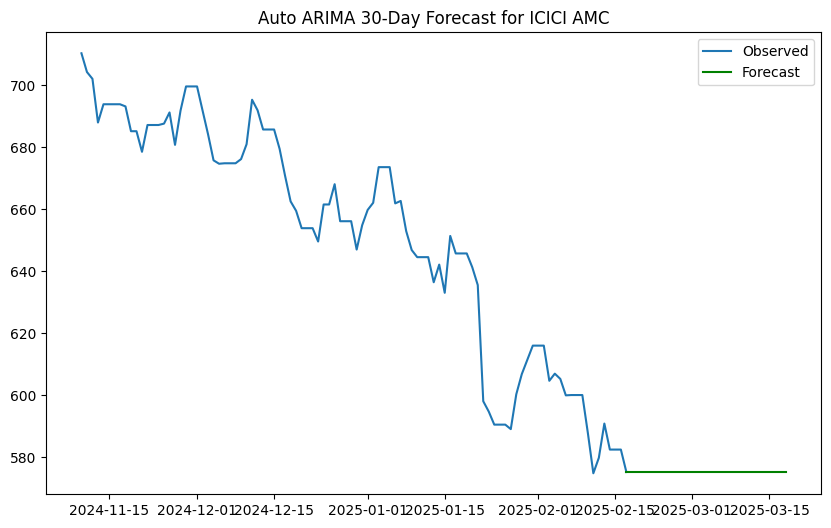

In [60]:
# Run auto_arima to find the best ARIMA model
auto_model_icici = pm.auto_arima(i,
                                 start_p=0, start_q=0,
                                 test='adf',
                                 max_p=5, max_q=5,
                                 seasonal=False,
                                 trace=True,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 stepwise=True)

# Print the summary of the best model
print(auto_model_icici.summary())

# Forecast the next 30 days
forecast_icici = auto_model_icici.predict(n_periods=30)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(i.index[-100:], i[-100:], label='Observed')
plt.plot(pd.date_range(i.index[-1], periods=30, freq='D'), forecast_icici, label='Forecast', color='green')
plt.title('Auto ARIMA 30-Day Forecast for ICICI AMC')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11548.814, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11538.016, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11536.824, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11547.964, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11537.887, Time=0.83 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11537.494, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11534.543, Time=2.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11536.274, Time=1.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11536.352, Time=3.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11538.437, Time=1.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11534.278, Time=3.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11537.041, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11536.275, Time=3.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11538.182, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11535.707, Time=1.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11533.785, Time=0.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11537.492, Time=0.70 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=11536.627, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=11535.784, Time=1.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=11535.784, Time=0.86 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11537.445, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11534.109, Time=1.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0]             : AIC=11537.670, Time=0.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=11535.904, Time=0.85 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 26.896 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1093
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -5762.892
Date:                Tue, 18 Feb 2025   AIC                          11533.785
Time:                        14:15:25   BIC                          11553.768
Sample:                    02-21-2022   HQIC                         11541.347
                         - 02-17-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9072      0.114     -7.954      0.000      -1.13

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


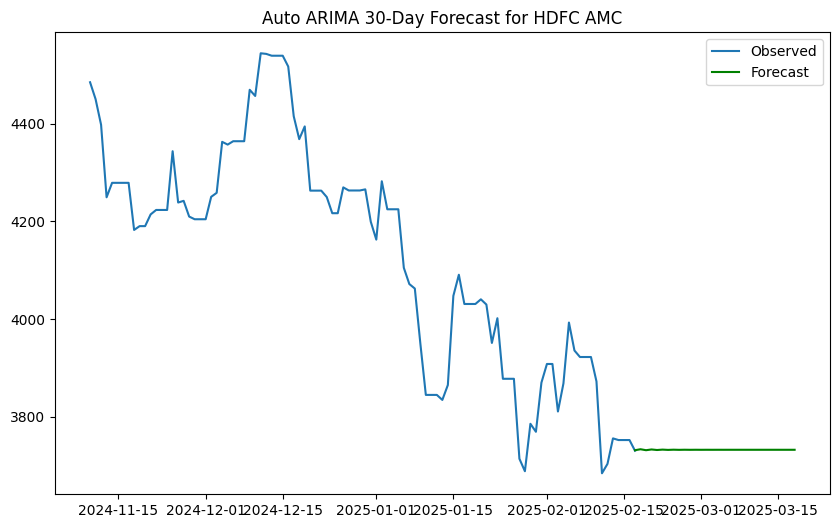

In [61]:
# Run auto_arima to find the best ARIMA model
auto_model_hdfc = pm.auto_arima(h,
                                start_p=0, start_q=0,
                                test='adf',
                                max_p=5, max_q=5,
                                seasonal=False,
                                trace=True,
                                error_action='ignore',
                                suppress_warnings=True,
                                stepwise=True)

# Print the summary of the best model
print(auto_model_hdfc.summary())

# Forecast the next 30 days
forecast_hdfc = auto_model_hdfc.predict(n_periods=30)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(h.index[-100:], h[-100:], label='Observed')
plt.plot(pd.date_range(h.index[-1], periods=30, freq='D'), forecast_hdfc, label='Forecast', color='green')
plt.title('Auto ARIMA 30-Day Forecast for HDFC AMC')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7933.934, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7929.788, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7928.535, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7932.620, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7928.366, Time=1.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7916.989, Time=2.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7921.884, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7918.113, Time=1.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7917.721, Time=1.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7918.697, Time=0.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7917.405, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7919.616, Time=2.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7915.893, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7927.261, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=7920.834, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=7916.966, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=7916.576, Time=0.66 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7928.579, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7917.615, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=7916.222, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=7918.486, Time=1.08 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 14.952 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1093
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3953.947
Date:                Tue, 18 Feb 2025   AIC                           7915.893
Time:                        14:15:40   BIC                           7935.876
Sample:                    02-21-2022   HQIC                          7923.456
                         - 02-17-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6180      0.132     -4.677      0.000      -0.877

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


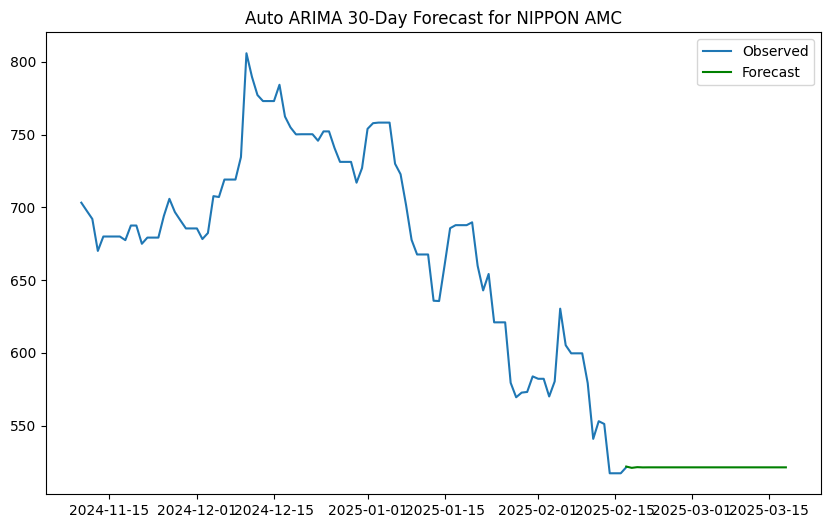

In [62]:
# Run auto_arima to find the best ARIMA model
auto_model_nippon = pm.auto_arima(n,
                                  start_p=0, start_q=0,
                                  test='adf',
                                  max_p=5, max_q=5,
                                  seasonal=False,
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)

# Print the summary of the best model
print(auto_model_nippon.summary())

# Forecast the next 30 days
forecast_nippon = auto_model_nippon.predict(n_periods=30)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(n.index[-100:], n[-100:], label='Observed')
plt.plot(pd.date_range(n.index[-1], periods=30, freq='D'), forecast_nippon, label='Forecast', color='green')
plt.title('Auto ARIMA 30-Day Forecast for NIPPON AMC')
plt.legend()
plt.show()

### **Auto ARIMA with seasonal component (SARIMA)**

In [63]:
auto_sarima_icici = pm.auto_arima(i,
                                  seasonal=True,
                                  m=12,  # Assuming monthly seasonality
                                  start_p=0, start_q=0,
                                  test='adf',
                                  max_p=3, max_q=3,
                                  start_P=0, start_Q=0,
                                  max_P=3, max_Q=3,
                                  d=1, D=1,
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)

print(auto_sarima_icici.summary())

forecast_sarima_icici = auto_sarima_icici.predict(n_periods=30)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8238.116, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7964.831, Time=1.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.95 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8239.978, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7808.585, Time=1.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=7768.347, Time=5.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=40.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=13.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=7768.844, Time=2.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=7770.262, Time=3.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=7770.306, Time=6.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[12]             : AIC=7768.402, Time=3.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=7771.737, Time=11.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12] intercept   : AIC=7770.335, Time=14.74 sec

Best model:  ARIMA(1,1,0)(3,1,0)[12]          
Total fit time: 108.216 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1093
Model:             SARIMAX(1, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -3879.173
Date:                            Tue, 18 Feb 2025   AIC                           7768.347
Time:                                    14:19:18   BIC                           7793.270
Sample:                                02-21-2022   HQIC                          7777.784
                                     - 02-17-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [64]:
auto_sarima_hdfc = pm.auto_arima(h,
                                 seasonal=True,
                                 m=12,
                                 start_p=0, start_q=0,
                                 test='adf',
                                 max_p=3, max_q=3,
                                 start_P=0, start_Q=0,
                                 max_P=3, max_Q=3,
                                 d=1, D=1,
                                 trace=True,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 stepwise=True)

print(auto_sarima_hdfc.summary())

forecast_sarima_hdfc = auto_sarima_hdfc.predict(n_periods=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=12236.205, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11841.379, Time=0.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,0)[12]             : AIC=12228.923, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=11714.292, Time=4.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=11655.552, Time=6.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=24.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=11665.397, Time=4.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=11653.831, Time=8.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[12]             : AIC=11710.940, Time=5.80 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=28.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=13.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[12]             : AIC=11655.517, Time=5.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=inf, Time=36.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=11649.544, Time=15.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[12]             : AIC=11702.481, Time=8.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,1)[12]             : AIC=inf, Time=38.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=14.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[12]             : AIC=11654.211, Time=4.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(3,1,0)[12]             : AIC=11650.337, Time=11.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(3,1,0)[12]             : AIC=11653.958, Time=5.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(3,1,0)[12]             : AIC=inf, Time=48.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12] intercept   : AIC=11651.419, Time=40.36 sec

Best model:  ARIMA(1,1,1)(3,1,0)[12]          
Total fit time: 335.501 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1093
Model:             SARIMAX(1, 1, 1)x(3, 1, [], 12)   Log Likelihood               -5818.772
Date:                             Tue, 18 Feb 2025   AIC                          11649.544
Time:                                     14:24:53   BIC                          11679.452
Sample:                                 02-21-2022   HQIC                         11660.869
                                      - 02-17-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [65]:
auto_sarima_nippon = pm.auto_arima(n,
                                   seasonal=True,
                                   m=12,
                                   start_p=0, start_q=0,
                                   test='adf',
                                   max_p=3, max_q=3,
                                   start_P=0, start_Q=0,
                                   max_P=3, max_Q=3,
                                   d=1, D=1,
                                   trace=True,
                                   error_action='ignore',
                                   suppress_warnings=True,
                                   stepwise=True)

print(auto_sarima_nippon.summary())

forecast_sarima_nippon = auto_sarima_nippon.predict(n_periods=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8619.192, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8266.444, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8616.959, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8124.523, Time=2.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[12]             : AIC=8095.397, Time=3.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=16.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[12]             : AIC=8101.101, Time=1.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[12]             : AIC=8086.020, Time=3.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[12]             : AIC=8115.268, Time=2.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=21.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=12.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[12]             : AIC=8083.672, Time=3.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,1,0)[12]             : AIC=8113.122, Time=2.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,1)[12]             : AIC=inf, Time=22.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,1,1)[12]             : AIC=inf, Time=12.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(3,1,0)[12]             : AIC=8083.385, Time=5.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,1,0)[12]             : AIC=8112.623, Time=5.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(3,1,1)[12]             : AIC=inf, Time=32.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,1,1)[12]             : AIC=inf, Time=20.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12]             : AIC=8081.730, Time=5.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,1,0)[12]             : AIC=8110.840, Time=3.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,1)[12]             : AIC=inf, Time=31.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,1,1)[12]             : AIC=inf, Time=17.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[12]             : AIC=8092.385, Time=4.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(3,1,0)[12]             : AIC=8082.780, Time=9.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(3,1,0)[12]             : AIC=8083.100, Time=4.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(3,1,0)[12]             : AIC=8084.557, Time=17.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[12] intercept   : AIC=8083.426, Time=28.76 sec

Best model:  ARIMA(2,1,1)(3,1,0)[12]          
Total fit time: 300.964 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1093
Model:             SARIMAX(2, 1, 1)x(3, 1, [], 12)   Log Likelihood               -4033.865
Date:                             Tue, 18 Feb 2025   AIC                           8081.730
Time:                                     14:29:54   BIC                           8116.623
Sample:                                 02-21-2022   HQIC                          8094.942
                                      - 02-17-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**SARIMA forecast plots**

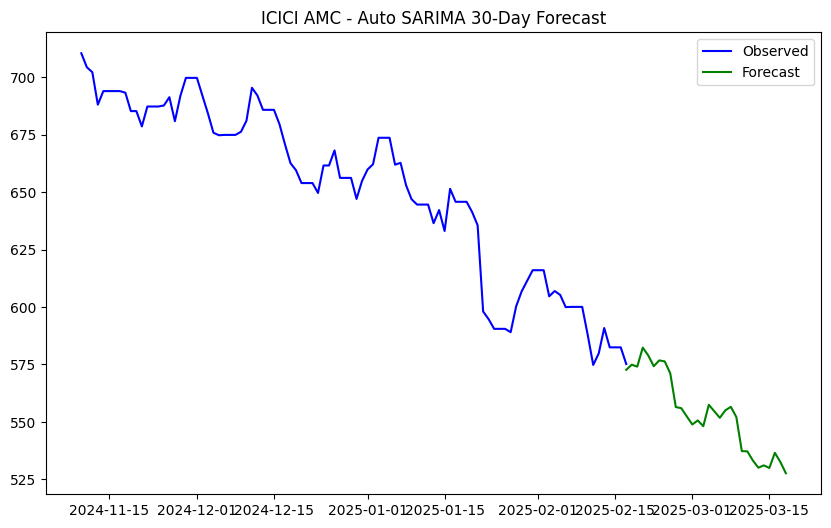

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(i.index[-100:], i[-100:], label='Observed', color='blue')
plt.plot(pd.date_range(i.index[-1], periods=30, freq='D'), forecast_sarima_icici, label='Forecast', color='green')
plt.title('ICICI AMC - Auto SARIMA 30-Day Forecast')
plt.legend()
plt.show()

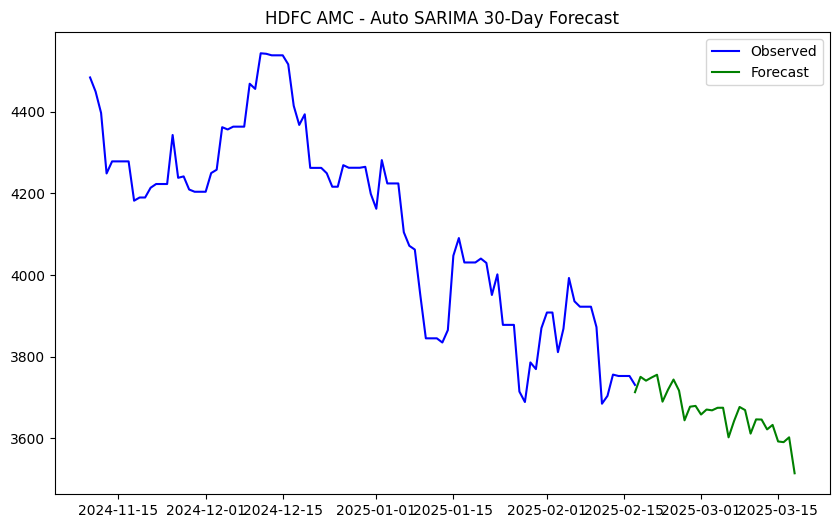

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(h.index[-100:], h[-100:], label='Observed', color='blue')
plt.plot(pd.date_range(h.index[-1], periods=30, freq='D'), forecast_sarima_hdfc, label='Forecast', color='green')
plt.title('HDFC AMC - Auto SARIMA 30-Day Forecast')
plt.legend()
plt.show()

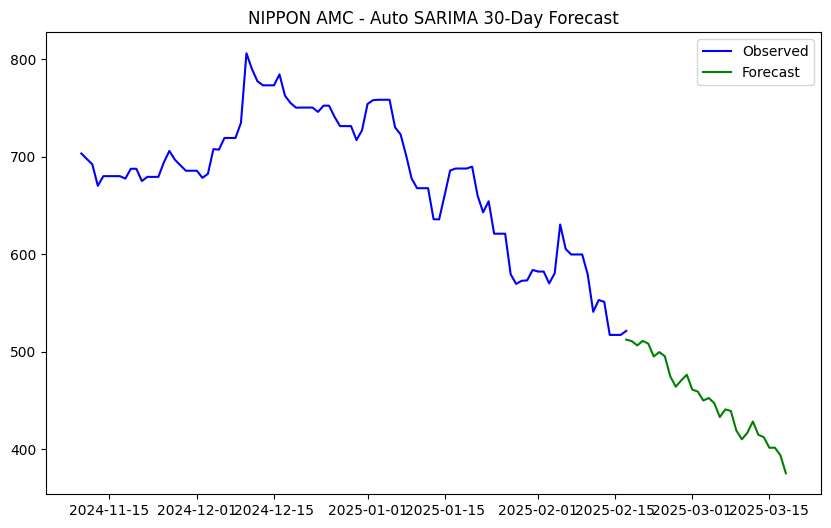

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(n.index[-100:], n[-100:], label='Observed', color='blue')
plt.plot(pd.date_range(n.index[-1], periods=30, freq='D'), forecast_sarima_nippon, label='Forecast', color='green')
plt.title('NIPPON AMC - Auto SARIMA 30-Day Forecast')
plt.legend()
plt.show()

**Plot diagnostics of the fitted SARIMA model to check the residuals**

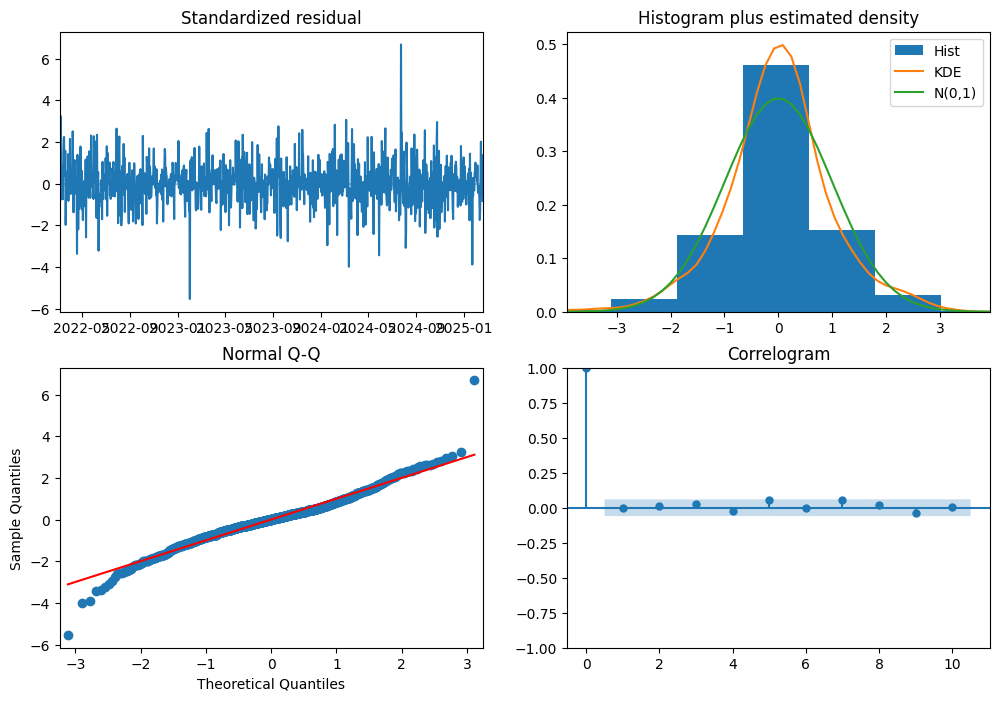

In [69]:
auto_sarima_icici.plot_diagnostics(figsize=(12, 8))
plt.show()

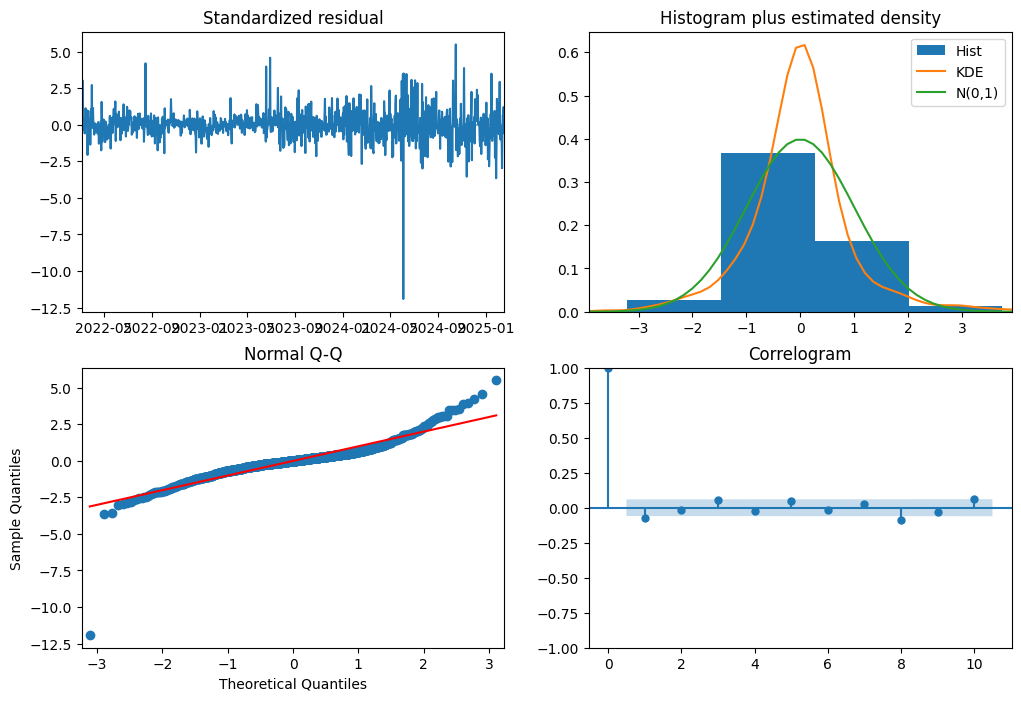

In [70]:
auto_sarima_hdfc.plot_diagnostics(figsize=(12, 8))
plt.show()

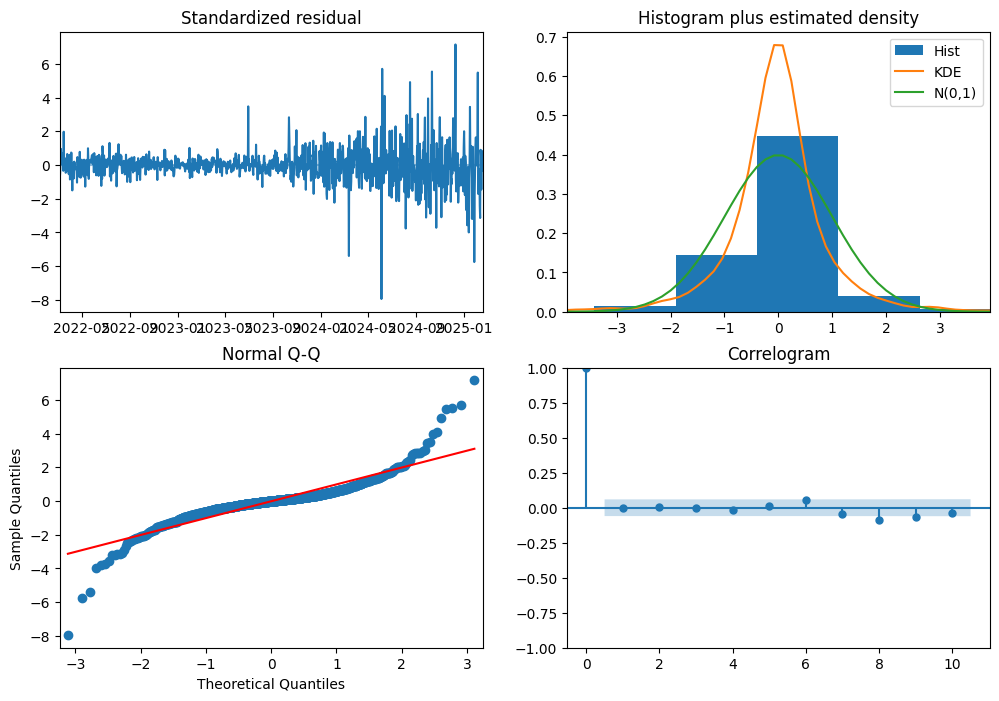

In [71]:
auto_sarima_nippon.plot_diagnostics(figsize=(12, 8))
plt.show()

**To apply the seasonal SARIMA model with quarterly seasonality (m=4)**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=8341.606, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=8000.183, Time=0.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=1.82 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=8339.707, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[4]             : AIC=7871.610, Time=0.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[4]             : AIC=7806.192, Time=2.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=4.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=3.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[4]             : AIC=7806.069, Time=0.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[4]             : AIC=7870.490, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,1)[4]             : AIC=inf, Time=2.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=4.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(3,1,0)[4]             : AIC=7806.300, Time=1.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[4]             : AIC=7807.902, Time=1.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[4] intercept   : AIC=7808.065, Time=1.16 sec

Best model:  ARIMA(0,1,0)(3,1,0)[4]          
Total fit time: 25.755 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1093
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 4)   Log Likelihood               -3899.035
Date:                           Tue, 18 Feb 2025   AIC                           7806.069
Time:                                   14:34:40   BIC                           7826.038
Sample:                               02-21-2022   HQIC                          7813.628
                                    - 02-17-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


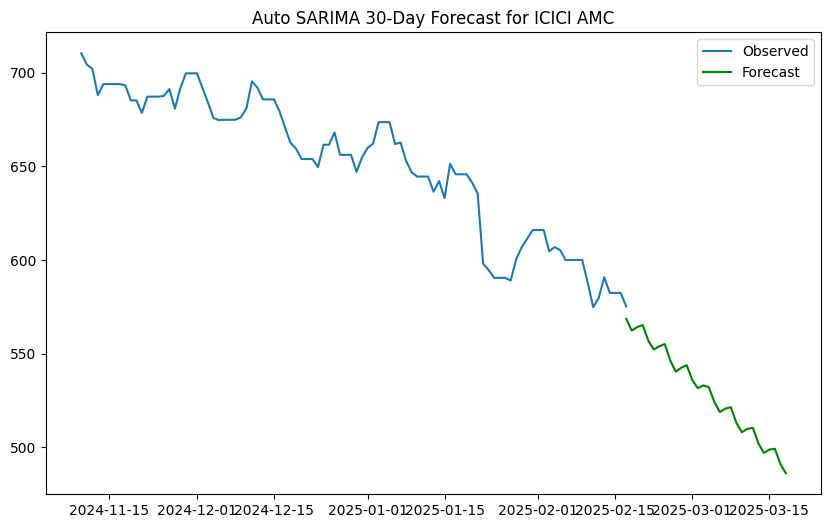

In [72]:
auto_sarima_icici = pm.auto_arima(i,
                                  seasonal=True,
                                  m=4,  # Quarterly seasonality
                                  start_p=0, start_q=0,
                                  test='adf',
                                  max_p=3, max_q=3,
                                  start_P=0, start_Q=0,
                                  max_P=3, max_Q=3,
                                  d=1, D=1,
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)

# Print the summary of the best model
print(auto_sarima_icici.summary())

# Forecast the next 30 periods
forecast_sarima_icici = auto_sarima_icici.predict(n_periods=30)

# Plot the observed and forecast values
plt.figure(figsize=(10, 6))
plt.plot(i.index[-100:], i[-100:], label='Observed')
plt.plot(pd.date_range(i.index[-1], periods=30, freq='D'), forecast_sarima_icici, label='Forecast', color='green')
plt.title('Auto SARIMA 30-Day Forecast for ICICI AMC')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=12304.640, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=12020.114, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=1.27 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=12287.880, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[4]             : AIC=11888.450, Time=0.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[4]             : AIC=11802.624, Time=0.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=4.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=1.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[4]             : AIC=11814.060, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[4]             : AIC=11799.105, Time=1.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[4]             : AIC=11887.408, Time=0.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,1)[4]             : AIC=inf, Time=3.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[4]             : AIC=inf, Time=2.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[4]             : AIC=11799.358, Time=1.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[4]             : AIC=inf, Time=7.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,0)[4]             : AIC=inf, Time=5.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(3,1,0)[4]             : AIC=inf, Time=8.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[4] intercept   : AIC=11801.104, Time=3.04 sec

Best model:  ARIMA(2,1,0)(3,1,0)[4]          
Total fit time: 42.198 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1093
Model:             SARIMAX(2, 1, 0)x(3, 1, 0, 4)   Log Likelihood               -5893.552
Date:                           Tue, 18 Feb 2025   AIC                          11799.105
Time:                                   14:35:23   BIC                          11829.057
Sample:                               02-21-2022   HQIC                         11810.442
                                    - 02-17-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


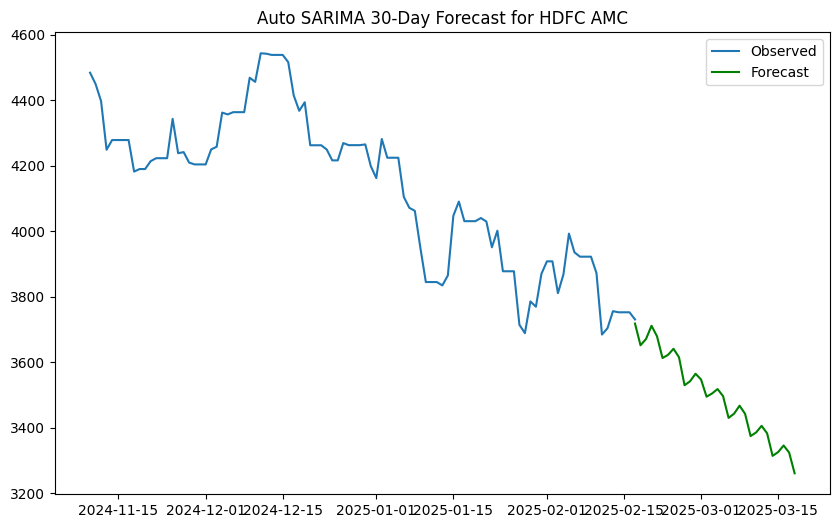

In [73]:
auto_sarima_hdfc = pm.auto_arima(h,
                                  seasonal=True,
                                  m=4,  # Quarterly seasonality
                                  start_p=0, start_q=0,
                                  test='adf',
                                  max_p=3, max_q=3,
                                  start_P=0, start_Q=0,
                                  max_P=3, max_Q=3,
                                  d=1, D=1,
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)

# Print the summary of the best model
print(auto_sarima_hdfc.summary())

# Forecast the next 30 periods
forecast_sarima_hdfc = auto_sarima_hdfc.predict(n_periods=30)

# Plot the observed and forecast values
plt.figure(figsize=(10, 6))
plt.plot(h.index[-100:], h[-100:], label='Observed')
plt.plot(pd.date_range(h.index[-1], periods=30, freq='D'), forecast_sarima_hdfc, label='Forecast', color='green')
plt.title('Auto SARIMA 30-Day Forecast for HDFC AMC')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=8691.642, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=8389.834, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.80 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=8676.229, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[4]             : AIC=8253.840, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,0)[4]             : AIC=8170.298, Time=1.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=3.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=1.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(3,1,0)[4]             : AIC=8176.803, Time=0.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,0)[4]             : AIC=8159.437, Time=0.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[4]             : AIC=8246.712, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(3,1,1)[4]             : AIC=inf, Time=3.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[4]             : AIC=inf, Time=3.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[4]             : AIC=8156.001, Time=1.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,1,0)[4]             : AIC=8242.112, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,1)[4]             : AIC=inf, Time=3.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,1,1)[4]             : AIC=inf, Time=2.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(3,1,0)[4]             : AIC=inf, Time=6.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(3,1,0)[4]             : AIC=inf, Time=4.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(3,1,0)[4] intercept   : AIC=8157.950, Time=3.41 sec

Best model:  ARIMA(3,1,0)(3,1,0)[4]          
Total fit time: 39.661 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1093
Model:             SARIMAX(3, 1, 0)x(3, 1, 0, 4)   Log Likelihood               -4071.000
Date:                           Tue, 18 Feb 2025   AIC                           8156.001
Time:                                   14:36:03   BIC                           8190.945
Sample:                               02-21-2022   HQIC                          8169.227
                                    - 02-17-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


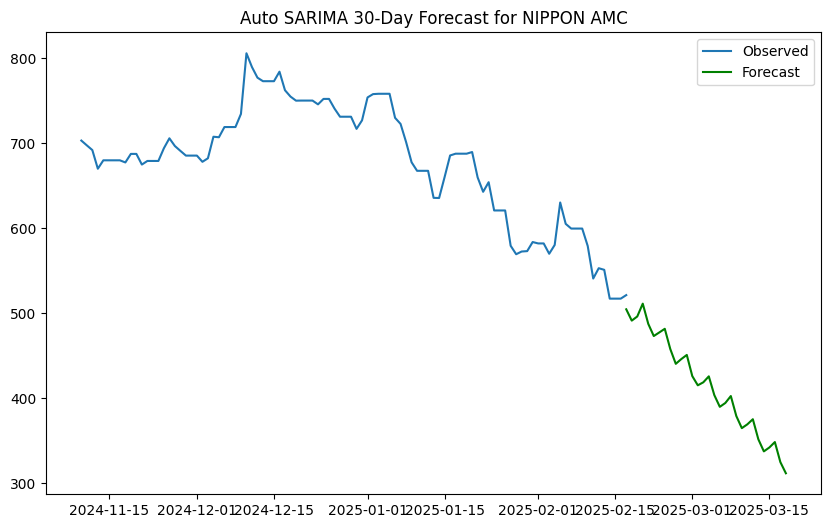

In [74]:
auto_sarima_nippon = pm.auto_arima(n,
                                    seasonal=True,
                                    m=4,  # Quarterly seasonality
                                    start_p=0, start_q=0,
                                    test='adf',
                                    max_p=3, max_q=3,
                                    start_P=0, start_Q=0,
                                    max_P=3, max_Q=3,
                                    d=1, D=1,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)

# Print the summary of the best model
print(auto_sarima_nippon.summary())

# Forecast the next 30 periods
forecast_sarima_nippon = auto_sarima_nippon.predict(n_periods=30)

# Plot the observed and forecast values
plt.figure(figsize=(10, 6))
plt.plot(n.index[-100:], n[-100:], label='Observed')
plt.plot(pd.date_range(n.index[-1], periods=30, freq='D'), forecast_sarima_nippon, label='Forecast', color='green')
plt.title('Auto SARIMA 30-Day Forecast for NIPPON AMC')
plt.legend()
plt.show()

## **Prophet**

In [75]:
!pip install prophet

In [76]:
from prophet import Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/6sn8_ipq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/huufkrr1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44900', 'data', 'file=/tmp/tmpsuou2jt5/6sn8_ipq.json', 'init=/tmp/tmpsuou2jt5/huufkrr1.json', 'output', 'file=/tmp/tmpsuou2jt5/prophet_model6xd_nbt9/prophet_model-20250218144106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


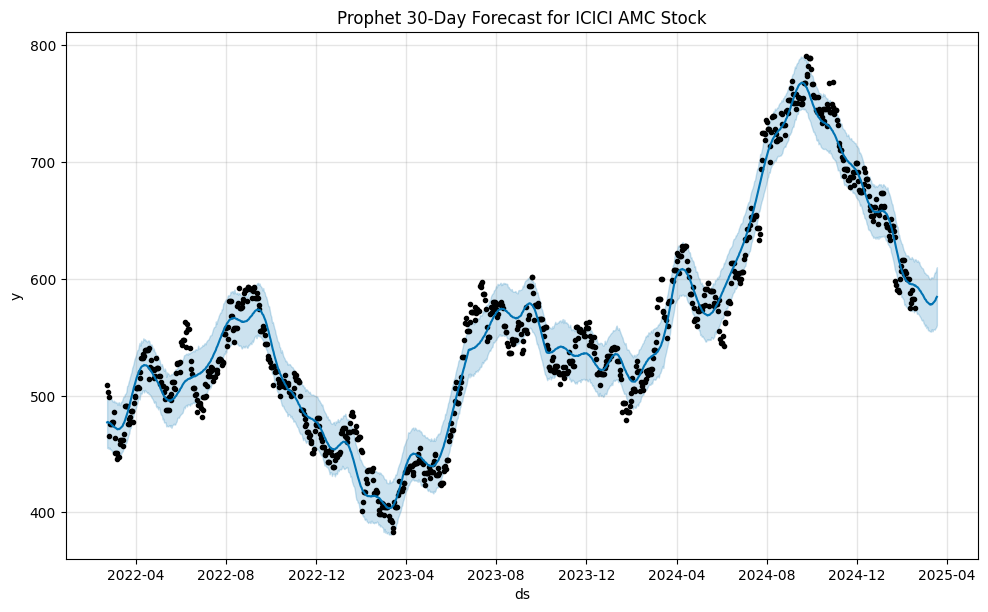

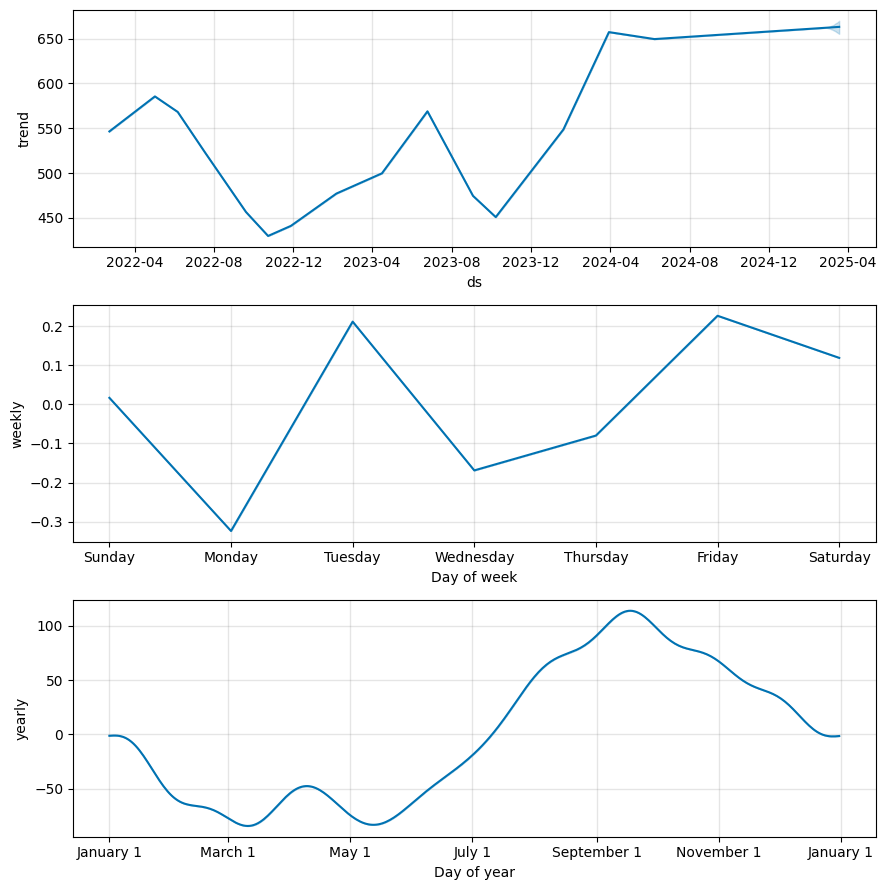

In [77]:
# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data_icici = i.reset_index()
prophet_data_icici.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values

# Initialize the Prophet model
model_icici = Prophet()

# Fit the model on the historical data
model_icici.fit(prophet_data_icici)

# Forecast for the next 30 days
future_icici = model_icici.make_future_dataframe(periods=30)
forecast_icici = model_icici.predict(future_icici)

# Plot the forecast
fig_icici = model_icici.plot(forecast_icici)
plt.title('Prophet 30-Day Forecast for ICICI AMC Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2_icici = model_icici.plot_components(forecast_icici)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/dozebc6f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/gmrvtqfp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88243', 'data', 'file=/tmp/tmpsuou2jt5/dozebc6f.json', 'init=/tmp/tmpsuou2jt5/gmrvtqfp.json', 'output', 'file=/tmp/tmpsuou2jt5/prophet_modelfy3lm9_l/prophet_model-20250218144111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


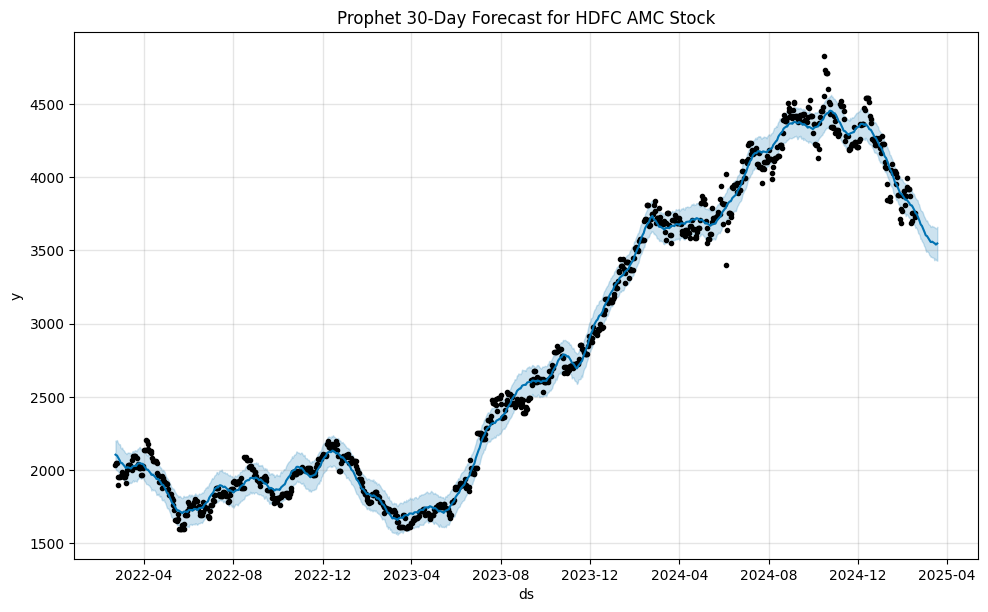

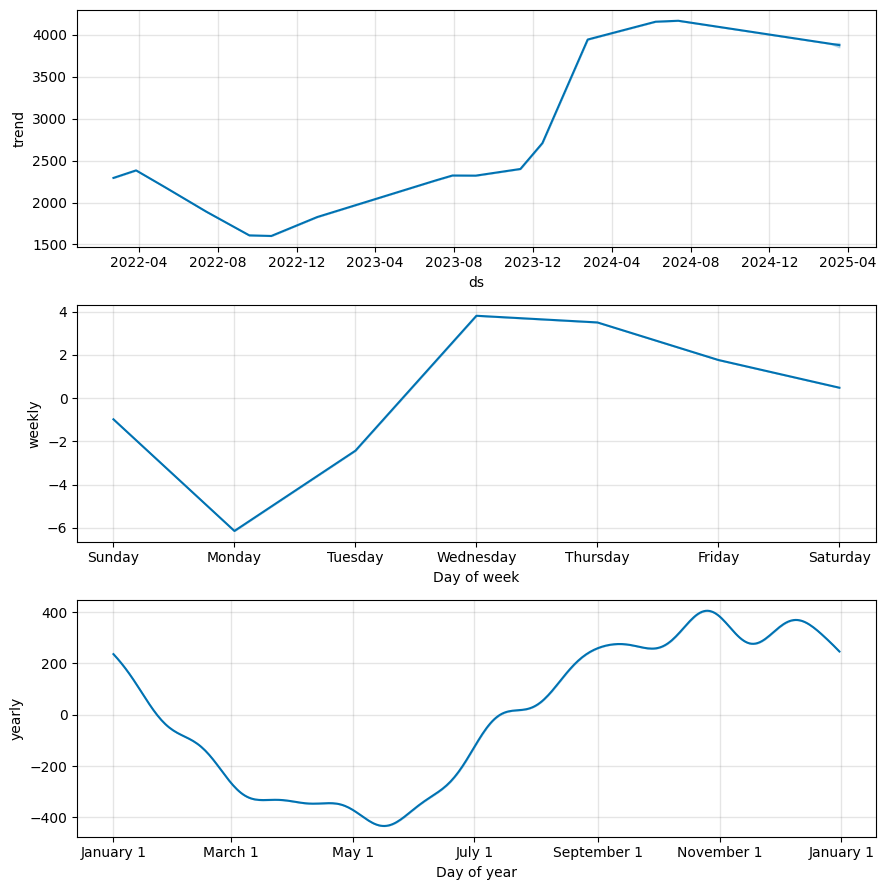

In [78]:
# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data_hdfc = h.reset_index()
prophet_data_hdfc.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values

# Initialize the Prophet model
model_hdfc = Prophet()

# Fit the model on the historical data
model_hdfc.fit(prophet_data_hdfc)

# Forecast for the next 30 days
future_hdfc = model_hdfc.make_future_dataframe(periods=30)
forecast_hdfc = model_hdfc.predict(future_hdfc)

# Plot the forecast
fig_hdfc = model_hdfc.plot(forecast_hdfc)
plt.title('Prophet 30-Day Forecast for HDFC AMC Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2_hdfc = model_hdfc.plot_components(forecast_hdfc)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/96otm1fi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/l0o4u9d0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36149', 'data', 'file=/tmp/tmpsuou2jt5/96otm1fi.json', 'init=/tmp/tmpsuou2jt5/l0o4u9d0.json', 'output', 'file=/tmp/tmpsuou2jt5/prophet_model_mjl679n/prophet_model-20250218144123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


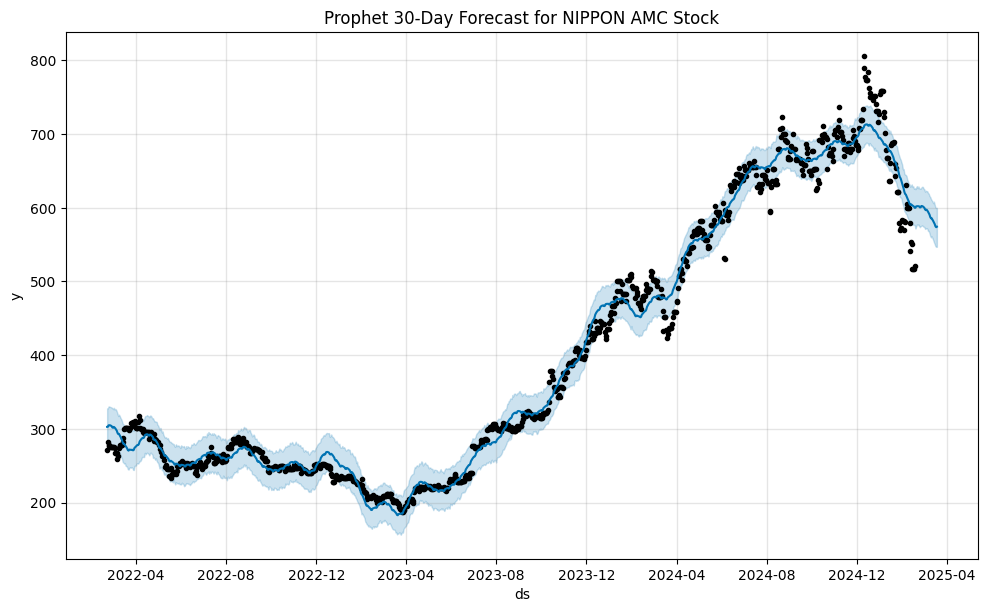

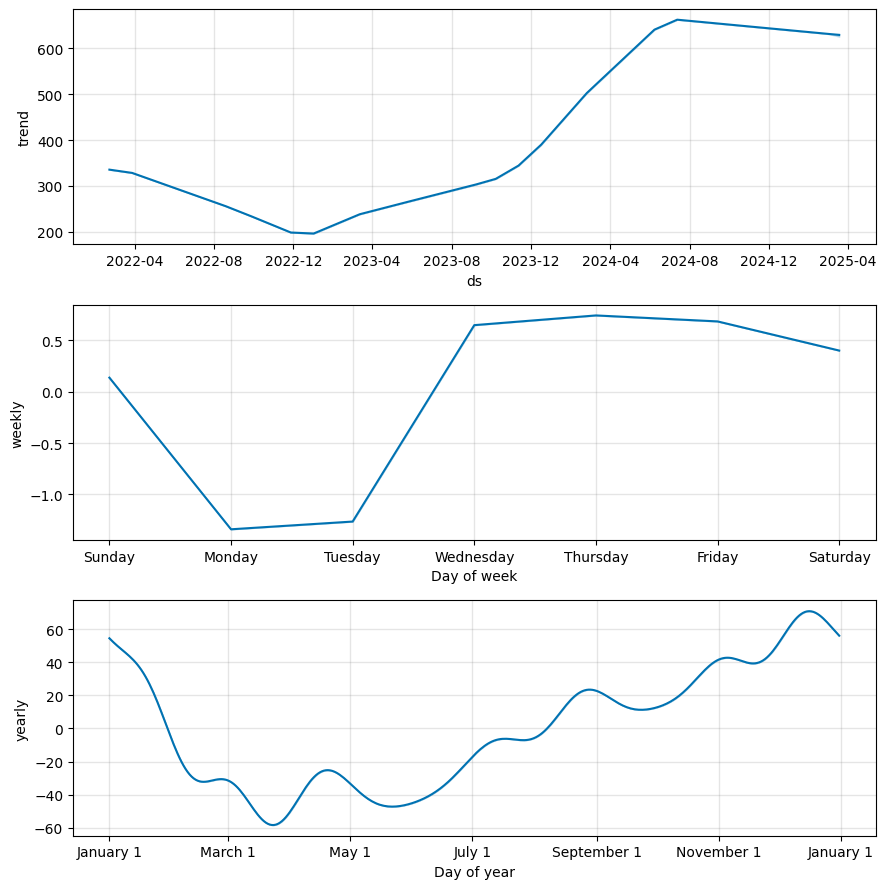

In [79]:
# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data_nippon = n.reset_index()
prophet_data_nippon.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values

# Initialize the Prophet model
model_nippon = Prophet()

# Fit the model on the historical data
model_nippon.fit(prophet_data_nippon)

# Forecast for the next 30 days
future_nippon = model_nippon.make_future_dataframe(periods=30)
forecast_nippon = model_nippon.predict(future_nippon)

# Plot the forecast
fig_nippon = model_nippon.plot(forecast_nippon)
plt.title('Prophet 30-Day Forecast for NIPPON AMC Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2_nippon = model_nippon.plot_components(forecast_nippon)
plt.show()

**Tuned prophet models :**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/cdn7zfr4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/scudv30d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16371', 'data', 'file=/tmp/tmpsuou2jt5/cdn7zfr4.json', 'init=/tmp/tmpsuou2jt5/scudv30d.json', 'output', 'file=/tmp/tmpsuou2jt5/prophet_modeljsqddca9/prophet_model-20250218144301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


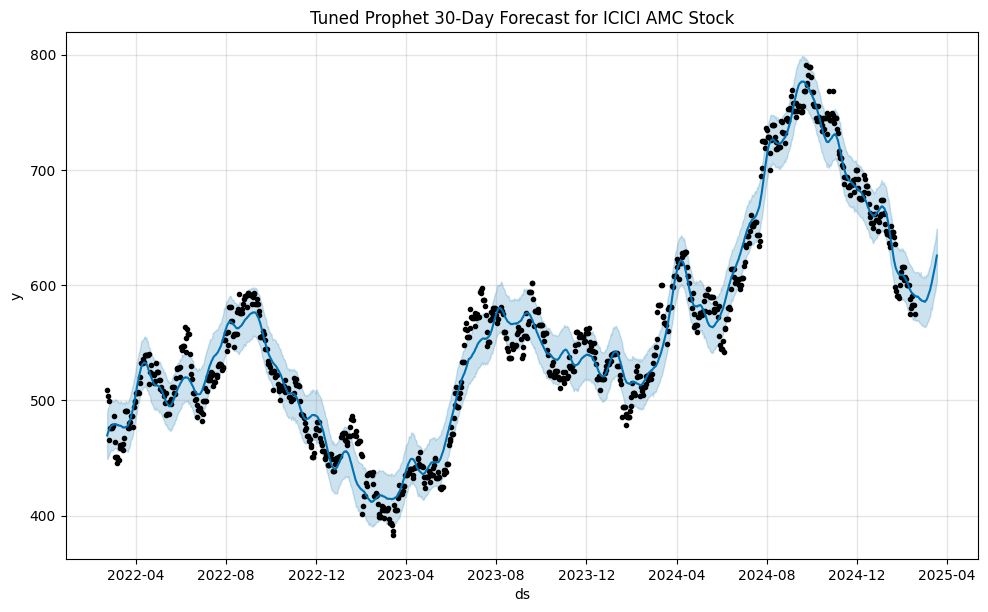

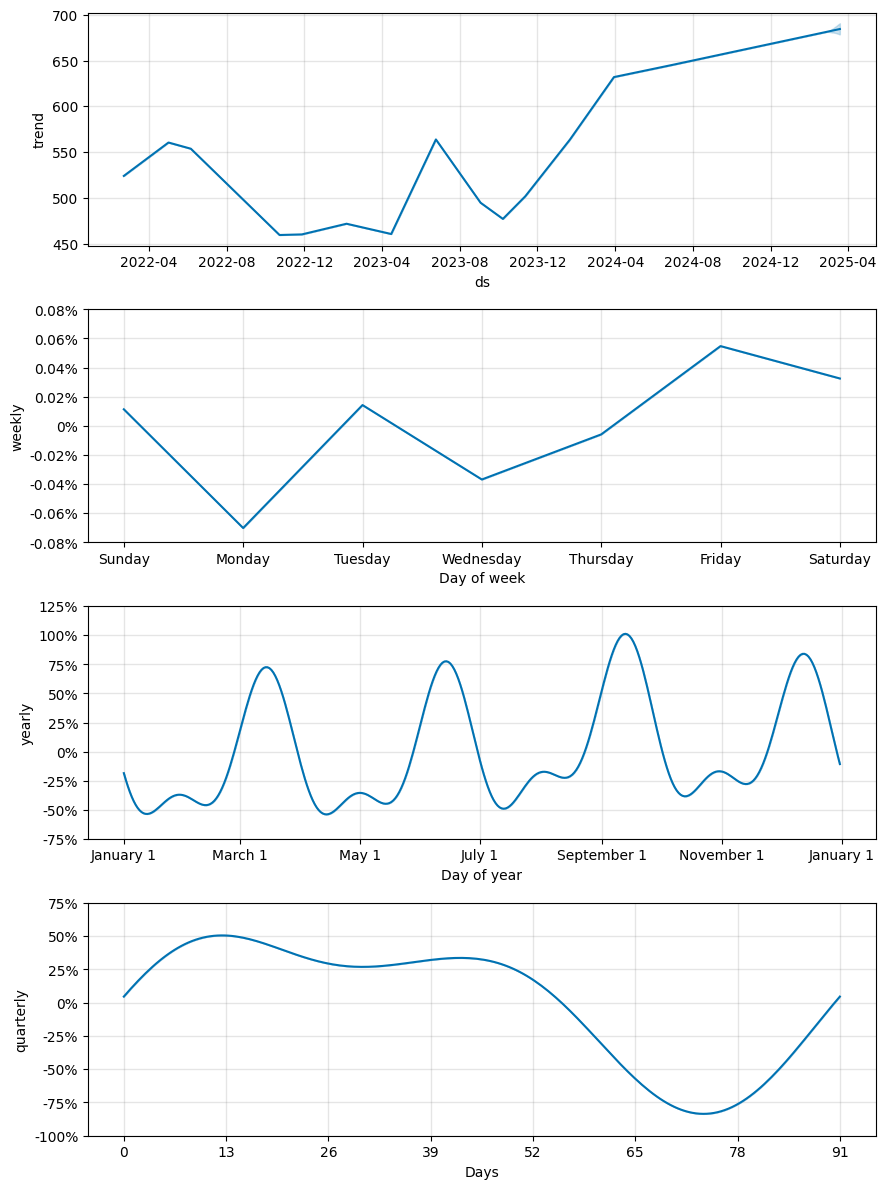

ds        yhat  yhat_lower  yhat_upper
1093 2025-02-18  590.704364  569.204749  610.929211
1094 2025-02-19  590.077310  569.476588  611.247368
1095 2025-02-20  589.988590  568.800746  611.304993
1096 2025-02-21  590.046389  569.345725  611.283738
1097 2025-02-22  589.463227  569.378479  610.861009
1098 2025-02-23  588.805827  567.577473  610.783053
1099 2025-02-24  587.668850  567.040631  608.384203
1100 2025-02-25  587.623767  567.065842  611.155722
1101 2025-02-26  586.660363  565.063012  607.319434
1102 2025-02-27  586.315510  565.038244  607.383132
1103 2025-02-28  586.291715  564.923091  606.409578
1104 2025-03-01  585.881381  563.966197  606.606501
1105 2025-03-02  585.711806  564.213253  608.177095
1106 2025-03-03  585.410205  563.282814  606.012480
1107 2025-03-04  586.554848  564.909671  606.877610
1108 2025-03-05  587.108728  565.256014  609.361502
1109 2025-03-06  588.562744  567.955638  608.316846
1110 2025-03-07  590.551700  568.125398  611.264674
1111 2025-03-08  592.288022  570.185024  613.726191
1112 2025-03-09  594.317398  571.768384  615.737790
1113 2025-03-10  596.187996  573.437939  617.033413
1114 2025-03-11  599.412900  580.081901  620.626810
1115 2025-03-12  601.900342  578.285825  623.951234
1116 2025-03-13  605.110817  582.635937  628.036920
1117 2025-03-14  608.665485  587.120194  629.853276
1118 2025-03-15  611.780505  589.319140  634.200053
1119 2025-03-16  615.021856  592.921834  636.217813
1120 2025-03-17  617.966074  595.261456  639.902006
1121 2025-03-18  622.161553  600.115504  645.179272
1122 2025-03-19  625.544508  602.676119  649.089207

In [80]:
# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data_icici = i.reset_index()
prophet_data_icici.columns = ['ds', 'y']

# Initialize the Prophet model with tuning parameters
model_icici = Prophet(
    growth='linear',              # or 'logistic' for saturation
    changepoint_prior_scale=0.05, # Higher values make the model more flexible in fitting
    seasonality_mode='multiplicative',  # Can be 'additive' or 'multiplicative'
    yearly_seasonality=True,      # Can be set to 'auto' or a specific number
    weekly_seasonality=True       # Weekly seasonality
)

# Add additional seasonality if needed (e.g., quarterly seasonality)
model_icici.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

# Fit the model
model_icici.fit(prophet_data_icici)

# Make future dataframe for the next 30 days
future_icici = model_icici.make_future_dataframe(periods=30)

# Forecast
forecast_icici = model_icici.predict(future_icici)

# Plot the forecast
fig_icici = model_icici.plot(forecast_icici)
plt.title('Tuned Prophet 30-Day Forecast for ICICI AMC Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2_icici = model_icici.plot_components(forecast_icici)
plt.show()

# Evaluate changepoints and seasonality components
forecast_icici[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/4t_4wr4d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/_1avdu5d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85104', 'data', 'file=/tmp/tmpsuou2jt5/4t_4wr4d.json', 'init=/tmp/tmpsuou2jt5/_1avdu5d.json', 'output', 'file=/tmp/tmpsuou2jt5/prophet_modelof5_evh8/prophet_model-20250218144313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


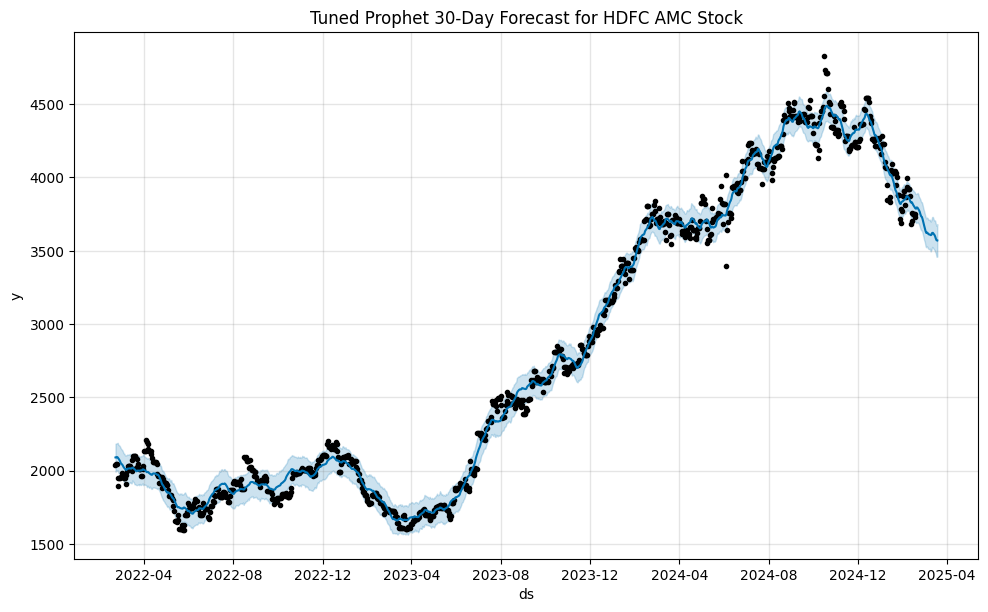

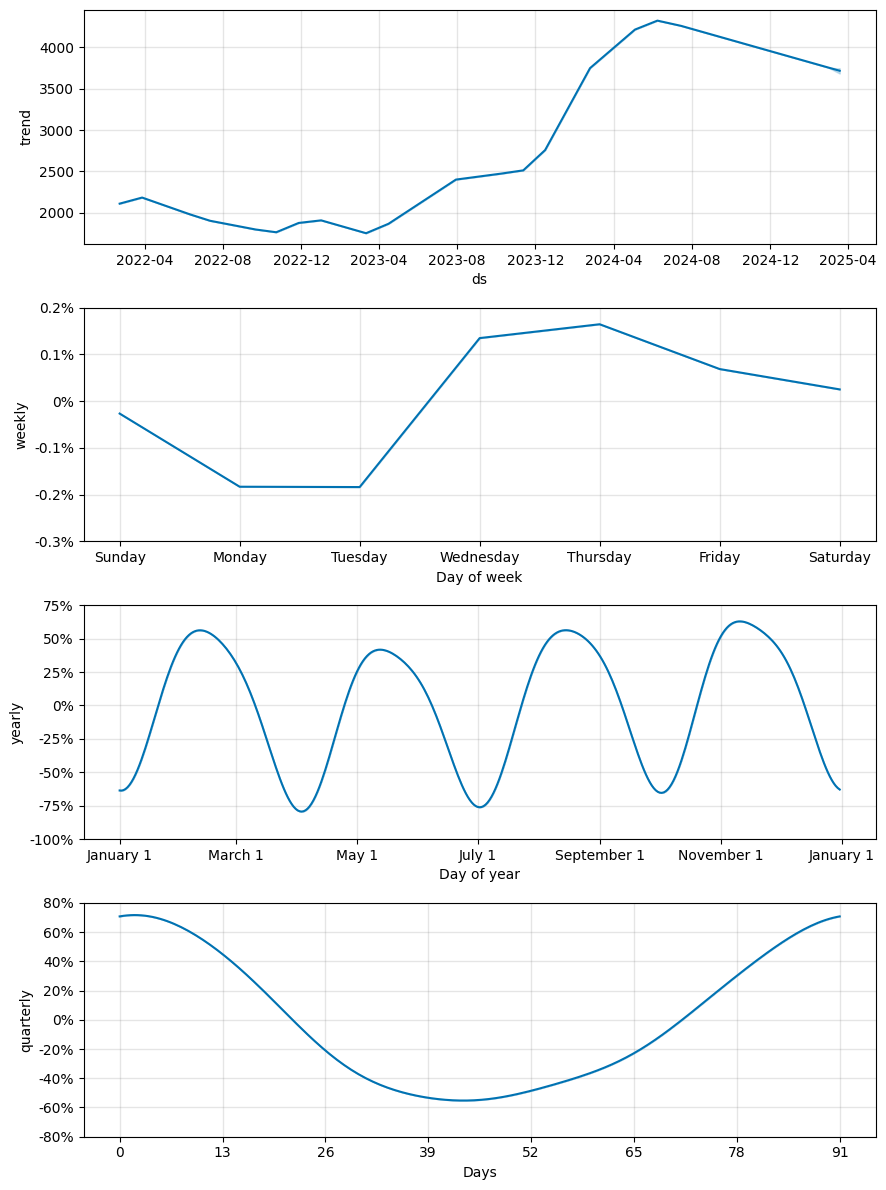

ds         yhat   yhat_lower   yhat_upper
1093 2025-02-18  3786.072220  3688.358651  3885.880495
1094 2025-02-19  3795.356655  3690.854840  3887.396096
1095 2025-02-20  3793.078529  3692.908502  3894.218497
1096 2025-02-21  3784.725706  3689.060697  3887.040341
1097 2025-02-22  3776.406404  3681.241220  3867.325841
1098 2025-02-23  3765.418974  3665.011614  3859.809502
1099 2025-02-24  3747.952738  3649.097093  3847.703052
1100 2025-02-25  3733.922295  3638.853354  3831.001415
1101 2025-02-26  3729.851287  3637.506736  3830.268430
1102 2025-02-27  3713.467984  3618.402274  3811.099243
1103 2025-02-28  3691.744325  3596.178773  3787.532742
1104 2025-03-01  3672.268054  3572.999543  3770.297340
1105 2025-03-02  3653.674075  3558.258873  3750.027457
1106 2025-03-03  3633.156340  3529.103096  3729.742394
1107 2025-03-04  3621.121548  3523.185496  3719.472364
1108 2025-03-05  3624.074212  3529.038057  3726.273520
1109 2025-03-06  3619.307156  3518.723433  3720.631266
1110 2025-03-07  3612.755099  3511.892634  3710.343120
1111 2025-03-08  3610.589748  3510.278578  3709.503550
1112 2025-03-09  3609.838773  3513.397751  3711.680213
1113 2025-03-10  3606.040663  3494.730485  3698.057250
1114 2025-03-11  3608.017263  3505.532503  3709.230571
1115 2025-03-12  3620.992632  3525.445341  3729.810508
1116 2025-03-13  3621.517508  3518.926901  3730.032693
1117 2025-03-14  3615.167444  3512.702722  3714.170484
1118 2025-03-15  3608.279033  3505.535033  3704.600833
1119 2025-03-16  3598.573003  3494.138779  3706.198937
1120 2025-03-17  3582.688740  3482.154156  3683.183794
1121 2025-03-18  3570.763623  3458.040109  3669.204127
1122 2025-03-19  3569.461303  3459.585375  3681.296334

In [81]:
# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data_hdfc = h.reset_index()
prophet_data_hdfc.columns = ['ds', 'y']

# Initialize the Prophet model with tuning parameters
model_hdfc = Prophet(
    growth='linear',              # or 'logistic' for saturation
    changepoint_prior_scale=0.05, # Higher values make the model more flexible in fitting
    seasonality_mode='multiplicative',  # Can be 'additive' or 'multiplicative'
    yearly_seasonality=True,      # Can be set to 'auto' or a specific number
    weekly_seasonality=True       # Weekly seasonality
)

# Add additional seasonality if needed (e.g., quarterly seasonality)
model_hdfc.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

# Fit the model
model_hdfc.fit(prophet_data_hdfc)

# Make future dataframe for the next 30 days
future_hdfc = model_hdfc.make_future_dataframe(periods=30)

# Forecast
forecast_hdfc = model_hdfc.predict(future_hdfc)

# Plot the forecast
fig_hdfc = model_hdfc.plot(forecast_hdfc)
plt.title('Tuned Prophet 30-Day Forecast for HDFC AMC Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2_hdfc = model_hdfc.plot_components(forecast_hdfc)
plt.show()

# Evaluate changepoints and seasonality components
forecast_hdfc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/8e1lo10o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/6b46e0yb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46687', 'data', 'file=/tmp/tmpsuou2jt5/8e1lo10o.json', 'init=/tmp/tmpsuou2jt5/6b46e0yb.json', 'output', 'file=/tmp/tmpsuou2jt5/prophet_model42fqlrob/prophet_model-20250218144323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


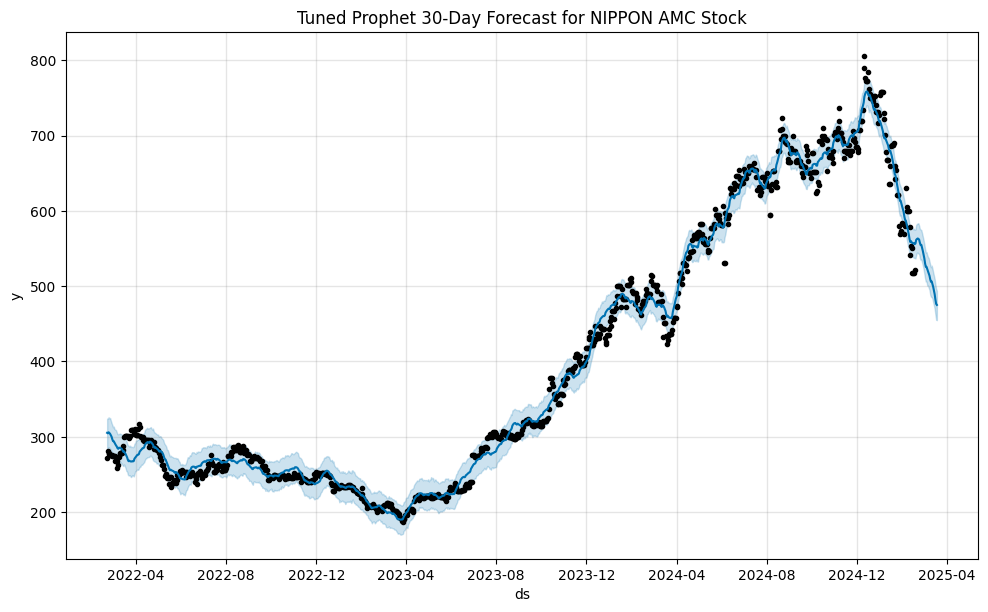

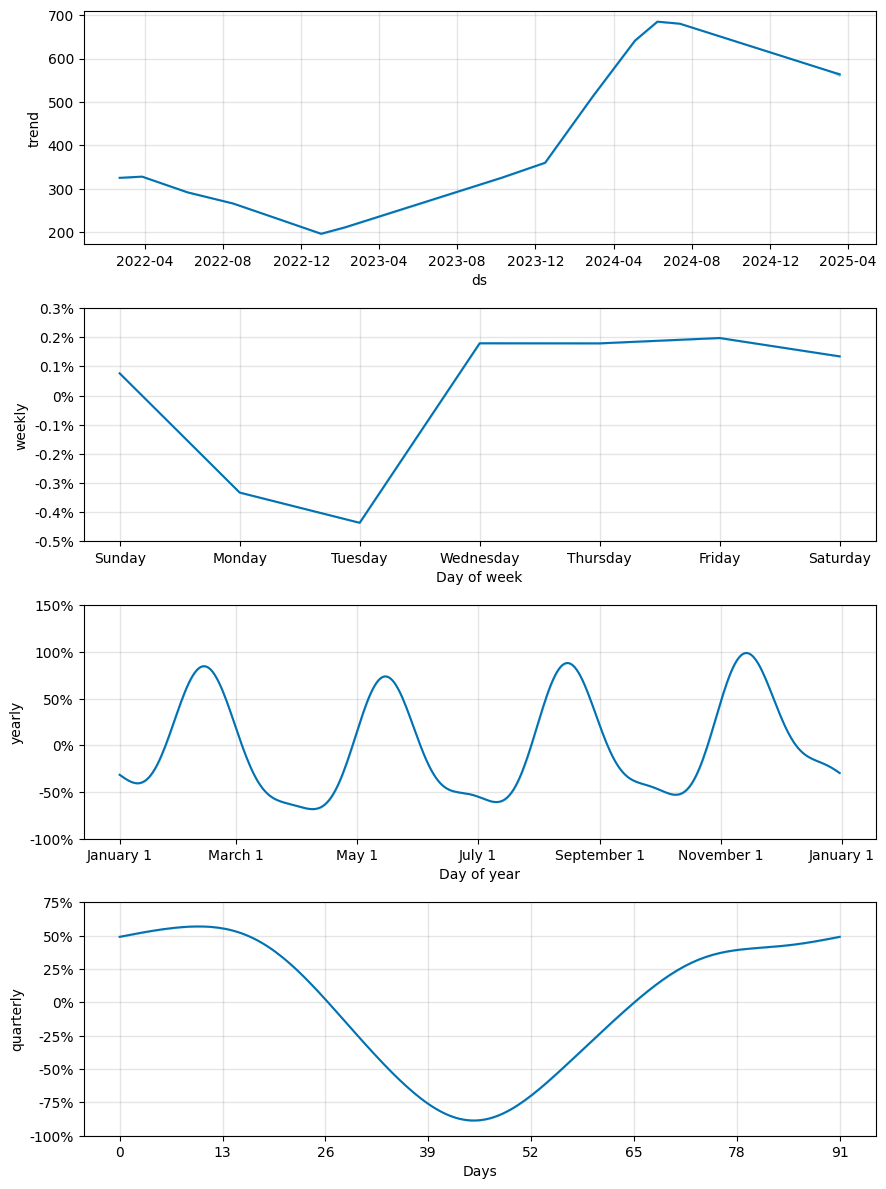

ds        yhat  yhat_lower  yhat_upper
1093 2025-02-18  556.668403  536.855069  575.397825
1094 2025-02-19  561.562138  541.656021  581.450180
1095 2025-02-20  562.656156  544.551220  582.771244
1096 2025-02-21  563.379589  544.540415  583.425236
1097 2025-02-22  562.969774  543.361384  583.645888
1098 2025-02-23  561.794468  542.753465  580.440839
1099 2025-02-24  557.753790  537.490667  576.049168
1100 2025-02-25  554.633566  534.915586  575.327682
1101 2025-02-26  554.889424  535.269017  574.512721
1102 2025-02-27  551.009611  531.555780  570.296512
1103 2025-02-28  546.820554  527.780904  565.925860
1104 2025-03-01  541.957956  522.823568  561.374711
1105 2025-03-02  537.119006  516.992133  555.671771
1106 2025-03-03  530.452260  510.593147  549.947427
1107 2025-03-04  525.841381  506.162182  545.053476
1108 2025-03-05  525.721458  506.240709  545.214339
1109 2025-03-06  522.496271  500.804924  541.310753
1110 2025-03-07  519.740161  500.669228  538.748833
1111 2025-03-08  516.787138  497.734959  537.184337
1112 2025-03-09  513.989970  494.955311  532.900480
1113 2025-03-10  509.171202  488.673023  528.594785
1114 2025-03-11  505.898723  485.886872  525.163611
1115 2025-03-12  506.377237  485.719520  527.378522
1116 2025-03-13  502.939766  483.323613  523.412876
1117 2025-03-14  499.140514  478.681173  518.396827
1118 2025-03-15  494.432374  474.543413  514.138489
1119 2025-03-16  489.382560  469.829197  509.588122
1120 2025-03-17  482.119549  462.175732  502.239636
1121 2025-03-18  476.527855  455.356592  496.483416
1122 2025-03-19  475.142812  454.921638  494.105099

In [82]:
# Prepare the data for Prophet. Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (values)
prophet_data_nippon = n.reset_index()
prophet_data_nippon.columns = ['ds', 'y']

# Initialize the Prophet model with tuning parameters
model_nippon = Prophet(
    growth='linear',              # or 'logistic' for saturation
    changepoint_prior_scale=0.05, # Higher values make the model more flexible in fitting
    seasonality_mode='multiplicative',  # Can be 'additive' or 'multiplicative'
    yearly_seasonality=True,      # Can be set to 'auto' or a specific number
    weekly_seasonality=True       # Weekly seasonality
)

# Add additional seasonality if needed (e.g., quarterly seasonality)
model_nippon.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

# Fit the model
model_nippon.fit(prophet_data_nippon)

# Make future dataframe for the next 30 days
future_nippon = model_nippon.make_future_dataframe(periods=30)

# Forecast
forecast_nippon = model_nippon.predict(future_nippon)

# Plot the forecast
fig_nippon = model_nippon.plot(forecast_nippon)
plt.title('Tuned Prophet 30-Day Forecast for NIPPON AMC Stock')
plt.show()

# Optional: Plot components (trend, seasonality, etc.)
fig2_nippon = model_nippon.plot_components(forecast_nippon)
plt.show()

# Evaluate changepoints and seasonality components
forecast_nippon[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

Hyperparameter tuning for the Prophet model using different combinations of changepoint prior scale, seasonality mode, and growth options.

It identifies the best model based on the mean absolute error (MAE) for forecast accuracy.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/s6xuhpli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/o84fbdms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94334', 'data', 'file=/tmp/tmpsuou2jt5/s6xuhpli.json', 'init=/tmp/tmpsuou2jt5/o84fbdms.json', 'output', 'file=/tmp/tmpsuou2jt5/prophet_modeltmooogs6/prophet_model-20250218151926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsu

ICICI Best Params: Changepoint Prior Scale = 0.1, Seasonality Mode = additive, Growth = linear
ICICI Best MAE: 10.892719128825226


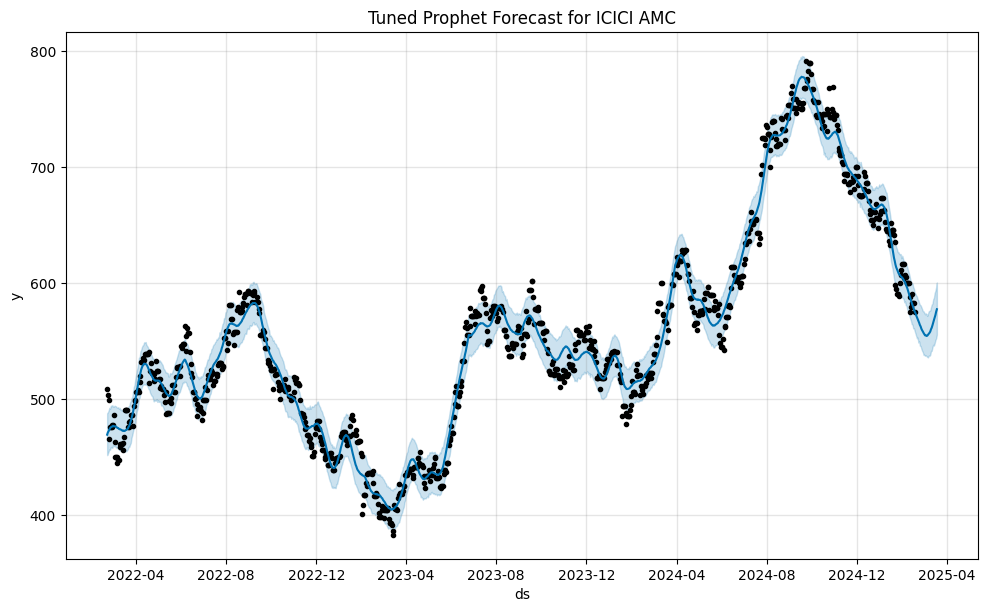

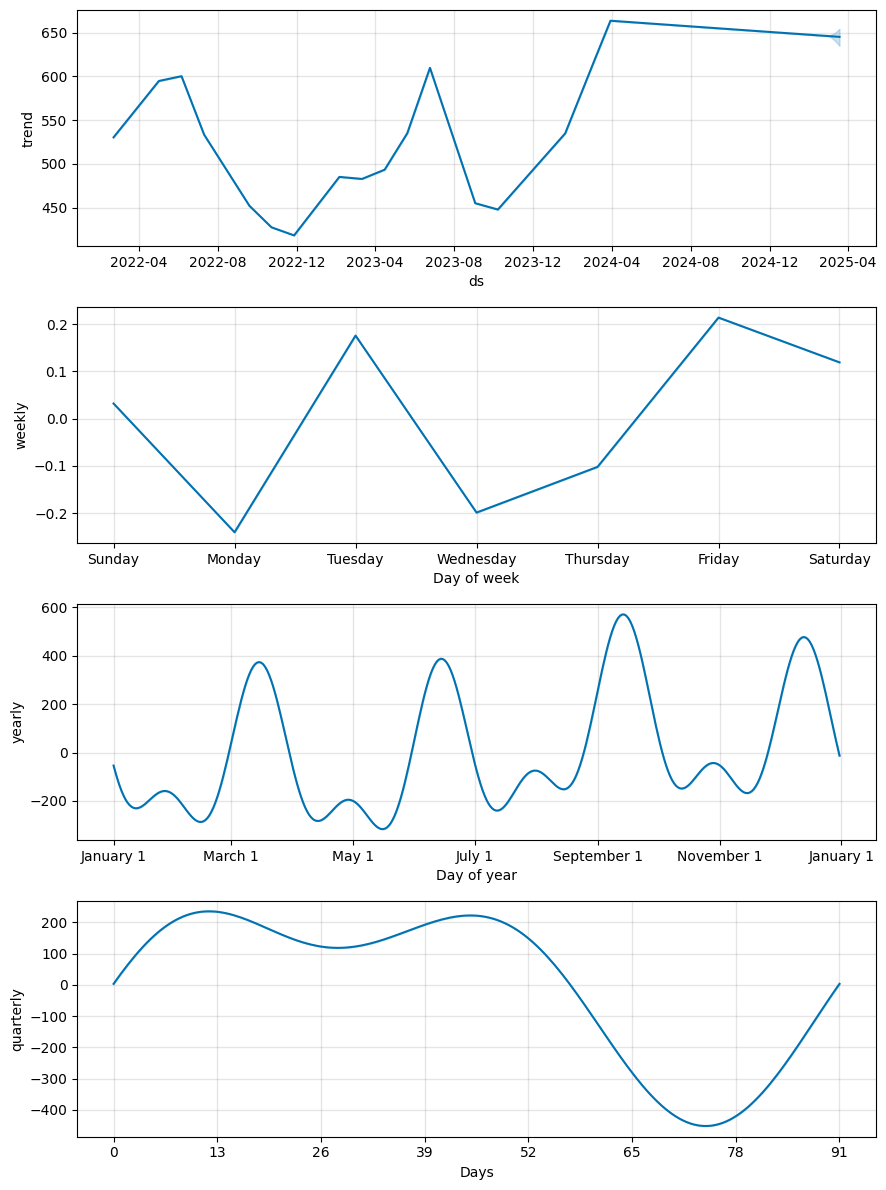

In [88]:
# ICICI AMC Stock Forecasting
# Prepare data for Prophet
prophet_data_icici = i.reset_index()
prophet_data_icici.columns = ['ds', 'y']

# Set a cap (upper limit) for logistic growth
prophet_data_icici['cap'] = 200

# Define parameter grids for tuning
changepoint_prior_scales = [0.001, 0.01, 0.05, 0.1]
seasonality_modes = ['additive', 'multiplicative']
growth_options = ['linear', 'logistic']

# Initialize variable to store the best model and its corresponding MAE
best_mae_icici = float('inf')
best_params_icici = None
best_model_icici = None

# Loop through different combinations of hyperparameters
for cps in changepoint_prior_scales:
    for sm in seasonality_modes:
        for growth in growth_options:
            # Initialize Prophet model with hyperparameters
            model_icici = Prophet(
                growth=growth,
                changepoint_prior_scale=cps,
                seasonality_mode=sm,
                yearly_seasonality=True,
                weekly_seasonality=True
            )

            # Add additional quarterly seasonality BEFORE fitting the model
            model_icici.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

            # Fit the model (with logistic cap if needed)
            if growth == 'logistic':
                model_icici.fit(prophet_data_icici[['ds', 'y', 'cap']])
            else:
                model_icici.fit(prophet_data_icici[['ds', 'y']])

            # Make future predictions
            future_icici = model_icici.make_future_dataframe(periods=30)
            if growth == 'logistic':
                future_icici['cap'] = 200

            forecast_icici = model_icici.predict(future_icici)

            # Evaluate model performance using MAE
            mae = mean_absolute_error(prophet_data_icici['y'], forecast_icici['yhat'][:len(prophet_data_icici)])

            # Track the best model based on MAE
            if mae < best_mae_icici:
                best_mae_icici = mae
                best_params_icici = (cps, sm, growth)
                best_model_icici = model_icici

# Output the best hyperparameters for ICICI
print(f"ICICI Best Params: Changepoint Prior Scale = {best_params_icici[0]}, Seasonality Mode = {best_params_icici[1]}, Growth = {best_params_icici[2]}")
print(f"ICICI Best MAE: {best_mae_icici}")

# Forecast using the best model for ICICI
future_icici = best_model_icici.make_future_dataframe(periods=30)
if best_params_icici[2] == 'logistic':
    future_icici['cap'] = 200
forecast_icici = best_model_icici.predict(future_icici)

# Plot the forecast for ICICI
fig_icici = best_model_icici.plot(forecast_icici)
plt.title('Tuned Prophet Forecast for ICICI AMC')
plt.show()

# Plot components for ICICI
fig2_icici = best_model_icici.plot_components(forecast_icici)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/1n02fxr5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/cy1s6cq_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17306', 'data', 'file=/tmp/tmpsuou2jt5/1n02fxr5.json', 'init=/tmp/tmpsuou2jt5/cy1s6cq_.json', 'output', 'file=/tmp/tmpsuou2jt5/prophet_modelsxyj24u2/prophet_model-20250218151944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsu

HDFC Best Params: Changepoint Prior Scale = 0.1, Seasonality Mode = multiplicative, Growth = linear
HDFC Best MAE: 52.1534666621701


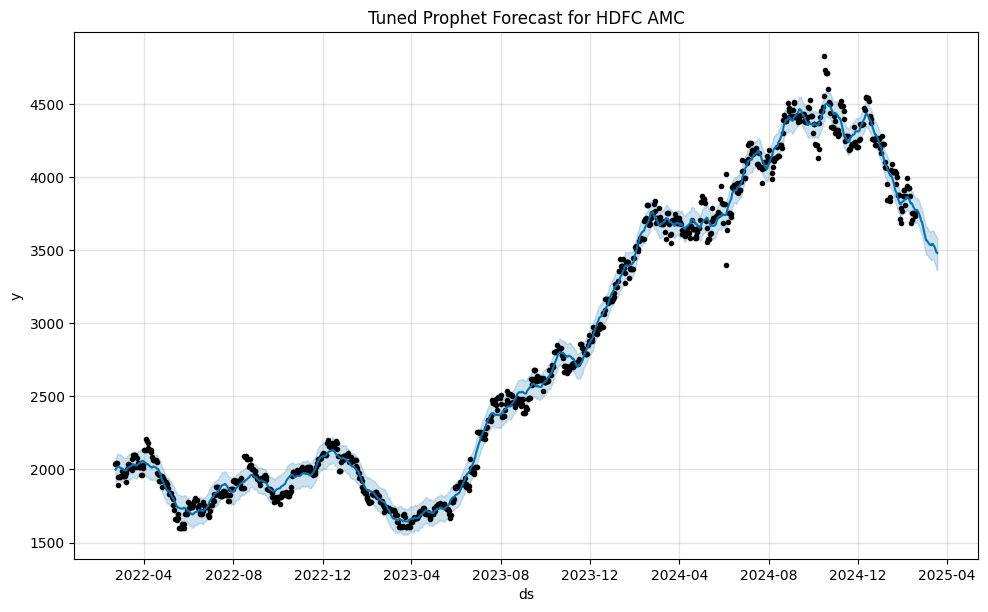

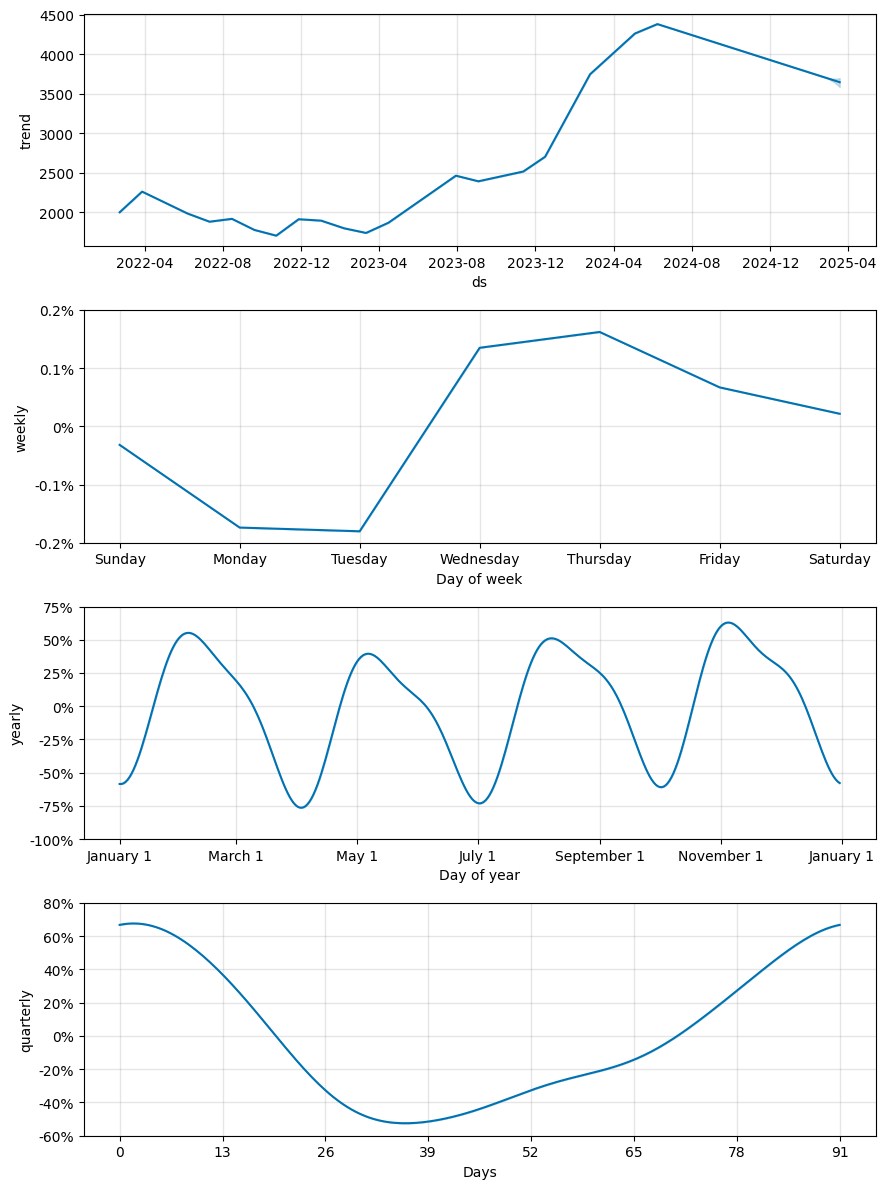

In [89]:
# HDFC AMC Stock Forecasting
# Prepare data for Prophet
prophet_data_hdfc = h.reset_index()
prophet_data_hdfc.columns = ['ds', 'y']

# Set a cap (upper limit) for logistic growth
prophet_data_hdfc['cap'] = 200

# Initialize variable to store the best model and its corresponding MAE
best_mae_hdfc = float('inf')
best_params_hdfc = None
best_model_hdfc = None

# Loop through different combinations of hyperparameters
for cps in changepoint_prior_scales:
    for sm in seasonality_modes:
        for growth in growth_options:
            # Initialize Prophet model with hyperparameters
            model_hdfc = Prophet(
                growth=growth,
                changepoint_prior_scale=cps,
                seasonality_mode=sm,
                yearly_seasonality=True,
                weekly_seasonality=True
            )

            # Add additional quarterly seasonality BEFORE fitting the model
            model_hdfc.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

            # Fit the model (with logistic cap if needed)
            if growth == 'logistic':
                model_hdfc.fit(prophet_data_hdfc[['ds', 'y', 'cap']])
            else:
                model_hdfc.fit(prophet_data_hdfc[['ds', 'y']])

            # Make future predictions
            future_hdfc = model_hdfc.make_future_dataframe(periods=30)
            if growth == 'logistic':
                future_hdfc['cap'] = 200

            forecast_hdfc = model_hdfc.predict(future_hdfc)

            # Evaluate model performance using MAE
            mae = mean_absolute_error(prophet_data_hdfc['y'], forecast_hdfc['yhat'][:len(prophet_data_hdfc)])

            # Track the best model based on MAE
            if mae < best_mae_hdfc:
                best_mae_hdfc = mae
                best_params_hdfc = (cps, sm, growth)
                best_model_hdfc = model_hdfc

# Output the best hyperparameters for HDFC
print(f"HDFC Best Params: Changepoint Prior Scale = {best_params_hdfc[0]}, Seasonality Mode = {best_params_hdfc[1]}, Growth = {best_params_hdfc[2]}")
print(f"HDFC Best MAE: {best_mae_hdfc}")

# Forecast using the best model for HDFC
future_hdfc = best_model_hdfc.make_future_dataframe(periods=30)
if best_params_hdfc[2] == 'logistic':
    future_hdfc['cap'] = 200
forecast_hdfc = best_model_hdfc.predict(future_hdfc)

# Plot the forecast for HDFC
fig_hdfc = best_model_hdfc.plot(forecast_hdfc)
plt.title('Tuned Prophet Forecast for HDFC AMC')
plt.show()

# Plot components for HDFC
fig2_hdfc = best_model_hdfc.plot_components(forecast_hdfc)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/4brxwfcz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuou2jt5/dwaj6qrx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61932', 'data', 'file=/tmp/tmpsuou2jt5/4brxwfcz.json', 'init=/tmp/tmpsuou2jt5/dwaj6qrx.json', 'output', 'file=/tmp/tmpsuou2jt5/prophet_modeltkmh3jc7/prophet_model-20250218152000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsu

NIPPON Best Params: Changepoint Prior Scale = 0.1, Seasonality Mode = multiplicative, Growth = linear
NIPPON Best MAE: 10.037149407061083


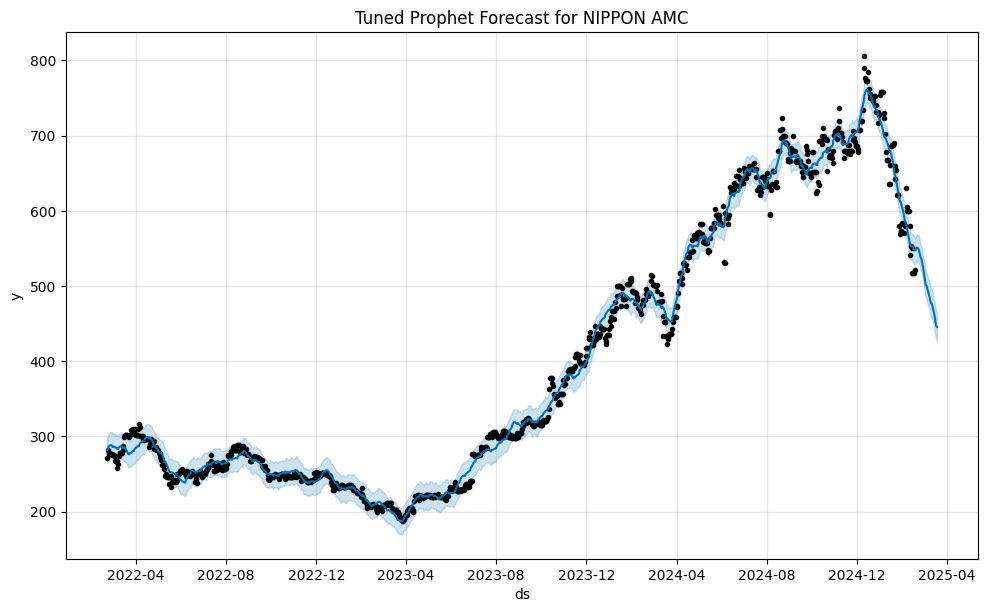

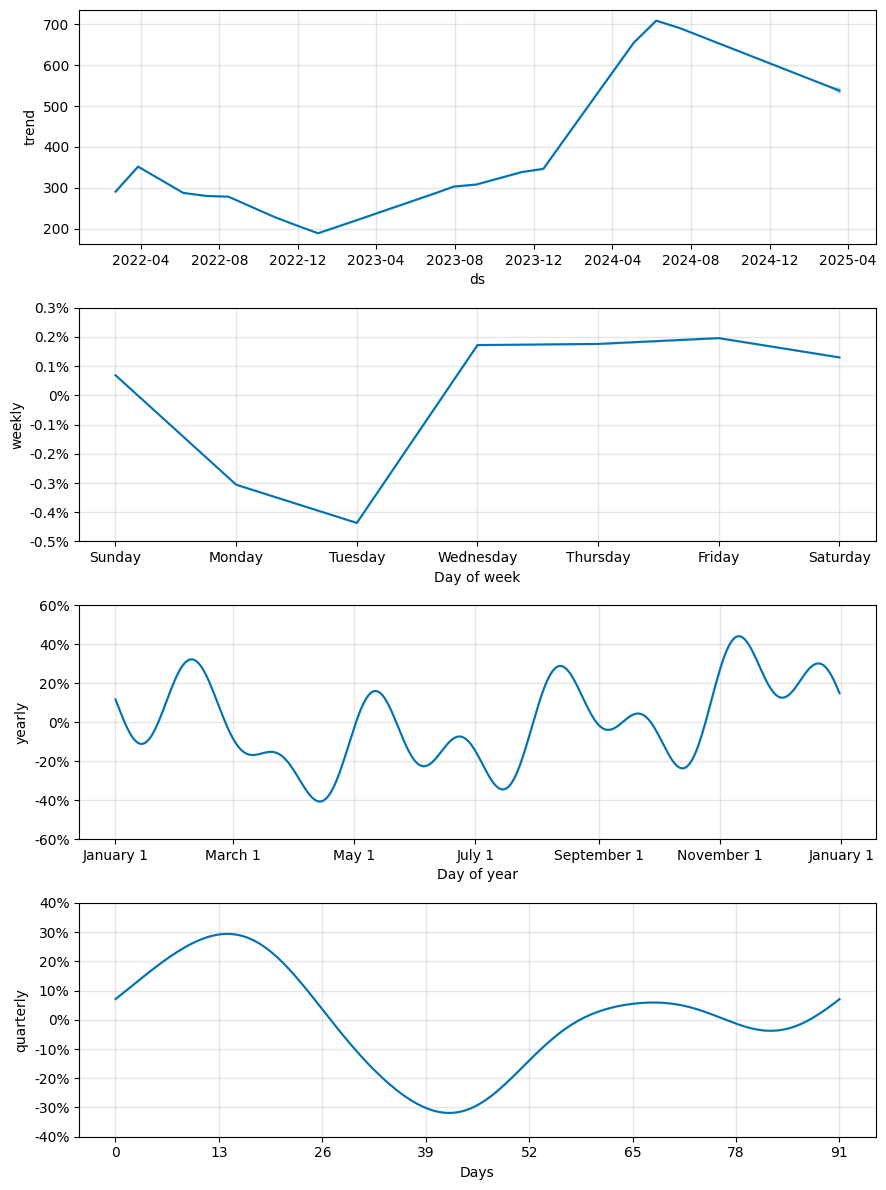

In [90]:
# NIPPON AMC Stock Forecasting
# Prepare data for Prophet
prophet_data_nippon = n.reset_index()
prophet_data_nippon.columns = ['ds', 'y']

# Set a cap (upper limit) for logistic growth
prophet_data_nippon['cap'] = 200

# Initialize variable to store the best model and its corresponding MAE
best_mae_nippon = float('inf')
best_params_nippon = None
best_model_nippon = None

# Loop through different combinations of hyperparameters
for cps in changepoint_prior_scales:
    for sm in seasonality_modes:
        for growth in growth_options:
            # Initialize Prophet model with hyperparameters
            model_nippon = Prophet(
                growth=growth,
                changepoint_prior_scale=cps,
                seasonality_mode=sm,
                yearly_seasonality=True,
                weekly_seasonality=True
            )

            # Add additional quarterly seasonality BEFORE fitting the model
            model_nippon.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

            # Fit the model (with logistic cap if needed)
            if growth == 'logistic':
                model_nippon.fit(prophet_data_nippon[['ds', 'y', 'cap']])
            else:
                model_nippon.fit(prophet_data_nippon[['ds', 'y']])

            # Make future predictions
            future_nippon = model_nippon.make_future_dataframe(periods=30)
            if growth == 'logistic':
                future_nippon['cap'] = 200

            forecast_nippon = model_nippon.predict(future_nippon)

            # Evaluate model performance using MAE
            mae = mean_absolute_error(prophet_data_nippon['y'], forecast_nippon['yhat'][:len(prophet_data_nippon)])

            # Track the best model based on MAE
            if mae < best_mae_nippon:
                best_mae_nippon = mae
                best_params_nippon = (cps, sm, growth)
                best_model_nippon = model_nippon

# Output the best hyperparameters for NIPPON
print(f"NIPPON Best Params: Changepoint Prior Scale = {best_params_nippon[0]}, Seasonality Mode = {best_params_nippon[1]}, Growth = {best_params_nippon[2]}")
print(f"NIPPON Best MAE: {best_mae_nippon}")

# Forecast using the best model for NIPPON
future_nippon = best_model_nippon.make_future_dataframe(periods=30)
if best_params_nippon[2] == 'logistic':
    future_nippon['cap'] = 200
forecast_nippon = best_model_nippon.predict(future_nippon)

# Plot the forecast for NIPPON
fig_nippon = best_model_nippon.plot(forecast_nippon)
plt.title('Tuned Prophet Forecast for NIPPON AMC')
plt.show()

# Plot components for NIPPON
fig2_nippon = best_model_nippon.plot_components(forecast_nippon)
plt.show()